In [ ]:
# ============================================================================
# STEP 1: IMPORT REQUIRED LIBRARIES
# ============================================================================
print("="*80)
print("STEP 1: IMPORTING LIBRARIES")
print("="*80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

STEP 1: IMPORTING LIBRARIES


In [ ]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!\n")

✓ All libraries imported successfully!



In [ ]:
# ============================================================================
# STEP 3: INITIAL DATA EXPLORATION
# ============================================================================
print("="*80)
print("STEP 3: INITIAL DATA EXPLORATION")
print("="*80)

print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- First 5 Records ---")
print(df.head())

print("\n--- Dataset Information ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Column Names ---")
print(df.columns.tolist())

STEP 3: INITIAL DATA EXPLORATION

--- Dataset Shape ---
Rows: 1095, Columns: 20

--- First 5 Records ---
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knigh

In [ ]:
# ============================================================================
# STEP 4: DATA QUALITY CHECK & CLEANING
# ============================================================================
print("\n" + "="*80)
print("STEP 4: DATA QUALITY CHECK & CLEANING")
print("="*80)

print("\n--- Missing Values Analysis ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

print("\n--- Duplicate Records Check ---")
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

# Handle missing values in key columns
df_cleaned = df.copy()

# For city - fill with 'Unknown'
if 'city' in df_cleaned.columns:
    df_cleaned['city'].fillna('Unknown', inplace=True)

# For player_of_match - keep as is (some matches might not have this data)
# For winner - keep as is (some matches might be ties/no results)

print(f"\n✓ Data cleaning completed!")
print(f"✓ Clean dataset shape: {df_cleaned.shape}")


STEP 4: DATA QUALITY CHECK & CLEANING

--- Missing Values Analysis ---
             Column  Missing_Count  Missing_Percentage
17           method           1074           98.082192
2              city             51            4.657534
13    result_margin             19            1.735160
11           winner              5            0.456621
5   player_of_match              5            0.456621
14      target_runs              3            0.273973
15     target_overs              3            0.273973

--- Duplicate Records Check ---
Duplicate rows found: 0

✓ Data cleaning completed!
✓ Clean dataset shape: (1095, 20)


In [ ]:
# ============================================================================
# STEP 5: FEATURE ENGINEERING
# ============================================================================
print("\n" + "="*80)
print("STEP 5: FEATURE ENGINEERING")
print("="*80)

# Convert date to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract year, month, day of week
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['month_name'] = df_cleaned['date'].dt.month_name()
df_cleaned['day_of_week'] = df_cleaned['date'].dt.day_name()

# Create a binary column for toss winner = match winner
df_cleaned['toss_winner_is_match_winner'] = (
    df_cleaned['toss_winner'] == df_cleaned['winner']
).astype(int)

# Season grouping
df_cleaned['season_group'] = pd.cut(
    df_cleaned['year'],
    bins=[2007, 2011, 2015, 2019, 2024],
    labels=['2008-2011', '2012-2015', '2016-2019', '2020+']
)

print("✓ New features created:")
print("  - year, month, month_name, day_of_week")
print("  - toss_winner_is_match_winner")
print("  - season_group")
print(f"\n✓ Updated dataset shape: {df_cleaned.shape}")


STEP 5: FEATURE ENGINEERING
✓ New features created:
  - year, month, month_name, day_of_week
  - toss_winner_is_match_winner
  - season_group

✓ Updated dataset shape: (1095, 26)


In [ ]:
# ============================================================================
# STEP 6: COMPREHENSIVE EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("\n" + "="*80)
print("STEP 6: EXPLORATORY DATA ANALYSIS")
print("="*80)

# 6.1: Matches per Season
print("\n--- 6.1: Matches Per Season ---")
matches_per_season = df_cleaned['season'].value_counts().sort_index()
print(matches_per_season)

# 6.2: Most Successful Teams
print("\n--- 6.2: Most Successful Teams (Total Wins) ---")
team_wins = df_cleaned['winner'].value_counts().head(10)
print(team_wins)

# 6.3: Toss Decision Analysis
print("\n--- 6.3: Toss Decision Preferences ---")
toss_decisions = df_cleaned['toss_decision'].value_counts()
print(toss_decisions)

# 6.4: Win by Result Type
print("\n--- 6.4: Wins by Result Type ---")
result_type = df_cleaned['result'].value_counts()
print(result_type)

# 6.5: Top Player of the Match Awards
print("\n--- 6.5: Top 15 Players (Most Player of Match Awards) ---")
top_players = df_cleaned['player_of_match'].value_counts().head(15)
print(top_players)

# 6.6: Most Matches Hosted by Venue
print("\n--- 6.6: Top 10 Venues (Most Matches Hosted) ---")
top_venues = df_cleaned['venue'].value_counts().head(10)
print(top_venues)

# 6.7: Most Matches in Cities
print("\n--- 6.7: Top 10 Cities (Most Matches) ---")
top_cities = df_cleaned['city'].value_counts().head(10)
print(top_cities)


STEP 6: EXPLORATORY DATA ANALYSIS

--- 6.1: Matches Per Season ---
season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

--- 6.2: Most Successful Teams (Total Wins) ---
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

--- 6.3: Toss Decision Preferences ---
toss_decision
field    704
bat      391
Name: count, dtype: int64

--- 6.4: Wins by Result Type ---
result
wickets      578
runs         498
tie           14
no result      5
Name: count, d

In [ ]:
# ============================================================================
# STEP 7: ADVANCED ANALYTICS
# ============================================================================
print("\n" + "="*80)
print("STEP 7: ADVANCED ANALYTICS")
print("="*80)

# 7.1: Toss Impact Analysis
print("\n--- 7.1: Toss Impact on Match Outcome ---")
toss_impact = df_cleaned['toss_winner_is_match_winner'].value_counts(normalize=True) * 100
print(f"Toss Winner Won Match: {toss_impact.get(1, 0):.2f}%")
print(f"Toss Winner Lost Match: {toss_impact.get(0, 0):.2f}%")

# 7.2: Bat vs Field Decision After Winning Toss
print("\n--- 7.2: Win Rate by Toss Decision ---")
toss_win_analysis = df_cleaned.groupby('toss_decision').agg({
    'toss_winner_is_match_winner': ['sum', 'count', 'mean']
}).round(3)
print(toss_win_analysis)

# 7.3: Win by Runs vs Wickets Analysis
print("\n--- 7.3: Average Winning Margin Analysis ---")
win_margin_analysis = df_cleaned.groupby('result')['result_margin'].agg(['mean', 'median', 'max']).round(2)
print(win_margin_analysis)

# 7.4: Home Advantage Analysis
print("\n--- 7.4: Home Advantage Analysis ---")
# Check if toss winner is playing at home venue
df_cleaned['home_match'] = (
    (df_cleaned['team1'] == df_cleaned['toss_winner']) |
    (df_cleaned['team2'] == df_cleaned['toss_winner'])
)

# 7.5: Seasonal Performance Trends
print("\n--- 7.5: Matches by Season Group ---")
season_performance = df_cleaned['season_group'].value_counts().sort_index()
print(season_performance)

# 7.6: Day of Week Analysis
print("\n--- 7.6: Matches by Day of Week ---")
day_analysis = df_cleaned['day_of_week'].value_counts()
print(day_analysis)

# 7.7: Month-wise Distribution
print("\n--- 7.7: Matches by Month ---")
month_analysis = df_cleaned['month_name'].value_counts()
print(month_analysis)



STEP 7: ADVANCED ANALYTICS

--- 7.1: Toss Impact on Match Outcome ---
Toss Winner Won Match: 50.59%
Toss Winner Lost Match: 49.41%

--- 7.2: Win Rate by Toss Decision ---
              toss_winner_is_match_winner             
                                      sum count   mean
toss_decision                                         
bat                                   177   391  0.453
field                                 377   704  0.536

--- 7.3: Average Winning Margin Analysis ---
            mean  median    max
result                         
no result    NaN     NaN    NaN
runs       30.10    22.0  146.0
tie          NaN     NaN    NaN
wickets     6.19     6.0   10.0

--- 7.4: Home Advantage Analysis ---

--- 7.5: Matches by Season Group ---
season_group
2008-2011    248
2012-2015    269
2016-2019    239
2020+        339
Name: count, dtype: int64

--- 7.6: Matches by Day of Week ---
day_of_week
Sunday       237
Saturday     207
Friday       139
Wednesday    139
Tuesday      13

In [ ]:
# ============================================================================
# STEP 8: TEAM-SPECIFIC DETAILED ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("STEP 8: TEAM-SPECIFIC ANALYSIS")
print("="*80)

# 8.1: Wins and Losses by Team
print("\n--- 8.1: Win-Loss Record by Team ---")

# Get all unique teams
all_teams = set(df_cleaned['team1'].unique()) | set(df_cleaned['team2'].unique())

team_stats = []
for team in all_teams:
    if pd.notna(team):
        # Matches played
        matches_played = len(df_cleaned[(df_cleaned['team1'] == team) | (df_cleaned['team2'] == team)])

        # Wins
        wins = len(df_cleaned[df_cleaned['winner'] == team])

        # Win percentage
        win_pct = (wins / matches_played * 100) if matches_played > 0 else 0

        team_stats.append({
            'Team': team,
            'Matches_Played': matches_played,
            'Wins': wins,
            'Losses': matches_played - wins,
            'Win_Percentage': round(win_pct, 2)
        })

team_stats_df = pd.DataFrame(team_stats).sort_values('Win_Percentage', ascending=False)
print(team_stats_df)

# 8.2: Head-to-Head Analysis (Top 5 teams)
print("\n--- 8.2: Head-to-Head Analysis (Sample: Top 5 Teams) ---")
top_5_teams = team_stats_df.head(5)['Team'].tolist()

for i, team1 in enumerate(top_5_teams[:3]):  # Show sample for first 3 teams
    print(f"\n{team1}:")
    for team2 in top_5_teams:
        if team1 != team2:
            # Matches between these teams
            h2h_matches = df_cleaned[
                ((df_cleaned['team1'] == team1) & (df_cleaned['team2'] == team2)) |
                ((df_cleaned['team1'] == team2) & (df_cleaned['team2'] == team1))
            ]

            team1_wins = len(h2h_matches[h2h_matches['winner'] == team1])
            total_matches = len(h2h_matches)

            print(f"  vs {team2}: {team1_wins}/{total_matches} wins")


STEP 8: TEAM-SPECIFIC ANALYSIS

--- 8.1: Win-Loss Record by Team ---
                           Team  Matches_Played  Wins  Losses  Win_Percentage
3        Rising Pune Supergiant              16    10       6           62.50
4                Gujarat Titans              45    28      17           62.22
9           Chennai Super Kings             238   138     100           57.98
8                Mumbai Indians             261   144     117           55.17
6          Lucknow Super Giants              44    24      20           54.55
18               Delhi Capitals              91    48      43           52.75
7         Kolkata Knight Riders             251   131     120           52.19
0              Rajasthan Royals             221   112     109           50.68
15          Sunrisers Hyderabad             182    88      94           48.35
14  Royal Challengers Bangalore             240   116     124           48.33
13  Royal Challengers Bengaluru              15     7       8           

In [ ]:
# ============================================================================
# STEP 9: VENUE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("STEP 9: VENUE ANALYSIS")
print("="*80)

# 9.1: Venue Win Patterns
print("\n--- 9.1: Toss Decision Preference by Top Venues ---")
top_5_venues = df_cleaned['venue'].value_counts().head(5).index

for venue in top_5_venues:
    venue_data = df_cleaned[df_cleaned['venue'] == venue]
    bat_first = len(venue_data[venue_data['toss_decision'] == 'bat'])
    field_first = len(venue_data[venue_data['toss_decision'] == 'field'])
    total = len(venue_data)

    print(f"\n{venue}:")
    print(f"  Total Matches: {total}")
    print(f"  Bat First: {bat_first} ({bat_first/total*100:.1f}%)")
    print(f"  Field First: {field_first} ({field_first/total*100:.1f}%)")

# 9.2: High Scoring vs Low Scoring Venues
print("\n--- 9.2: Average Winning Margin by Venue (Top 10) ---")
venue_margin = df_cleaned.groupby('venue')['result_margin'].agg(['mean', 'count']).sort_values('mean', ascending=False)
venue_margin_filtered = venue_margin[venue_margin['count'] >= 10].head(10)
print(venue_margin_filtered.round(2))


STEP 9: VENUE ANALYSIS

--- 9.1: Toss Decision Preference by Top Venues ---

Eden Gardens:
  Total Matches: 77
  Bat First: 28 (36.4%)
  Field First: 49 (63.6%)

Wankhede Stadium:
  Total Matches: 73
  Bat First: 22 (30.1%)
  Field First: 51 (69.9%)

M Chinnaswamy Stadium:
  Total Matches: 65
  Bat First: 8 (12.3%)
  Field First: 57 (87.7%)

Feroz Shah Kotla:
  Total Matches: 60
  Bat First: 26 (43.3%)
  Field First: 34 (56.7%)

Rajiv Gandhi International Stadium, Uppal:
  Total Matches: 49
  Bat First: 23 (46.9%)
  Field First: 26 (53.1%)

--- 9.2: Average Winning Margin by Venue (Top 10) ---
                                                     mean  count
venue                                                           
Maharashtra Cricket Association Stadium, Pune       28.31     13
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...  24.00     13
M Chinnaswamy Stadium                               23.87     62
Sawai Mansingh Stadium, Jaipur                      21.70     10
Arun Jai


STEP 10: DATA VISUALIZATIONS

--- Creating Visualization 1: Matches Per Season ---


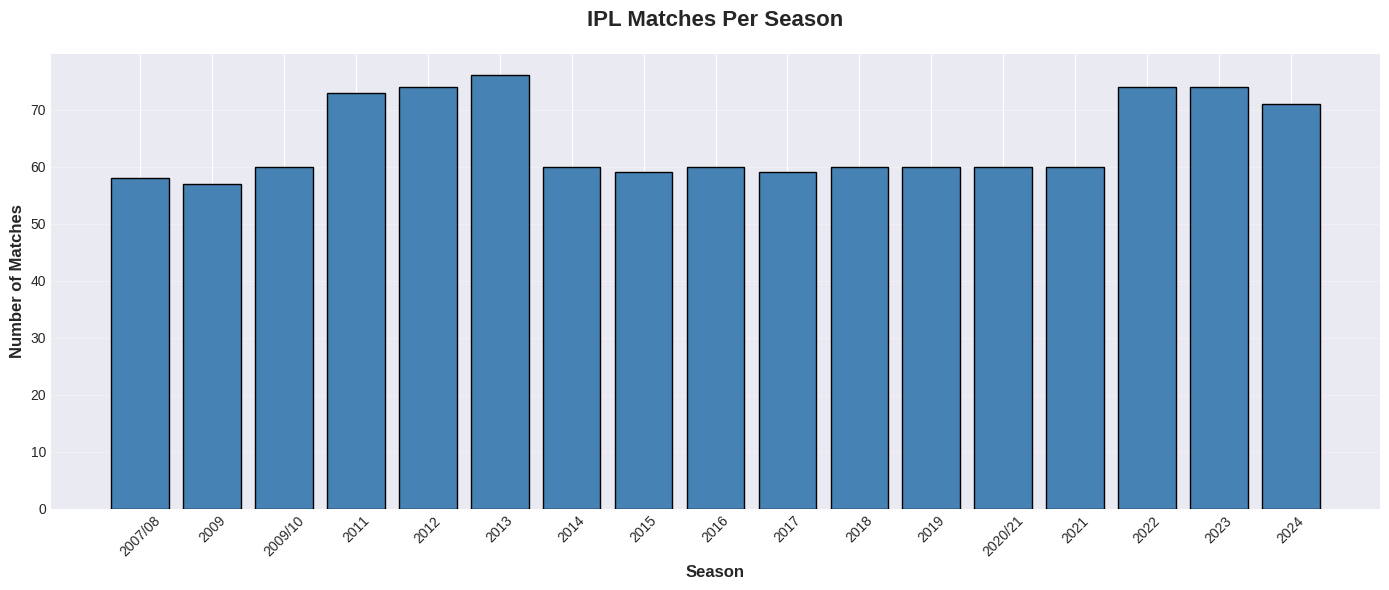

✓ Saved: 01_matches_per_season.png

--- Creating Visualization 2: Top Teams by Wins ---


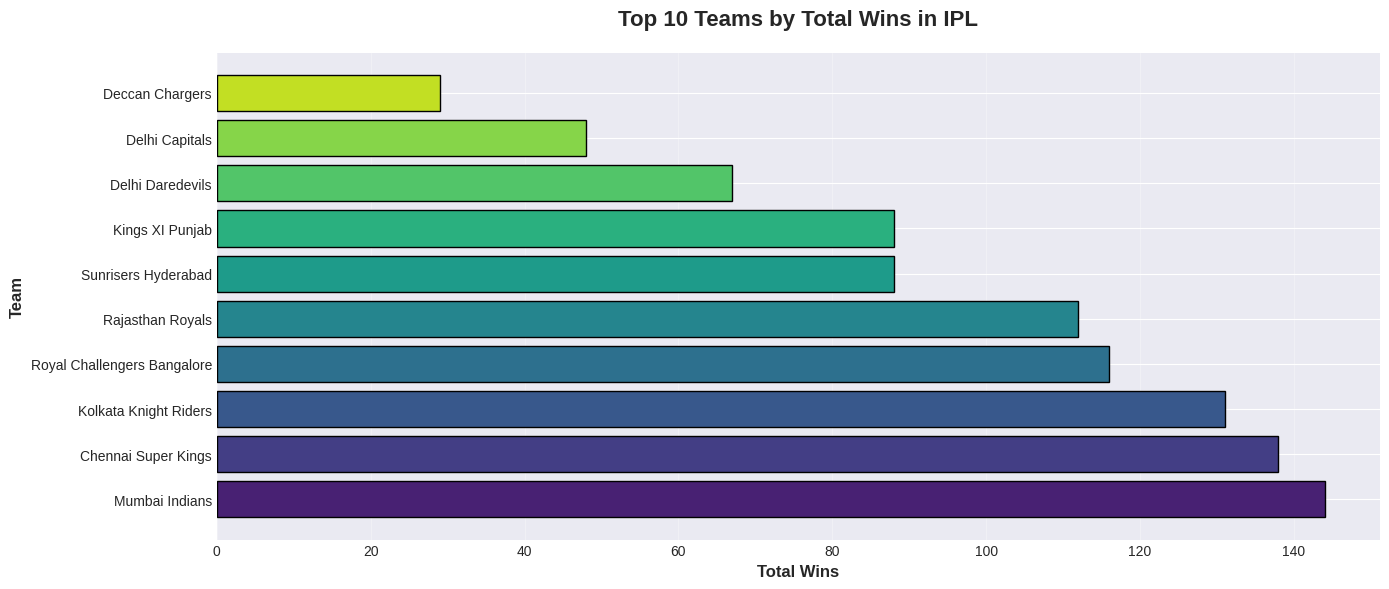

✓ Saved: 02_top_teams_wins.png

--- Creating Visualization 3: Toss Decision Distribution ---


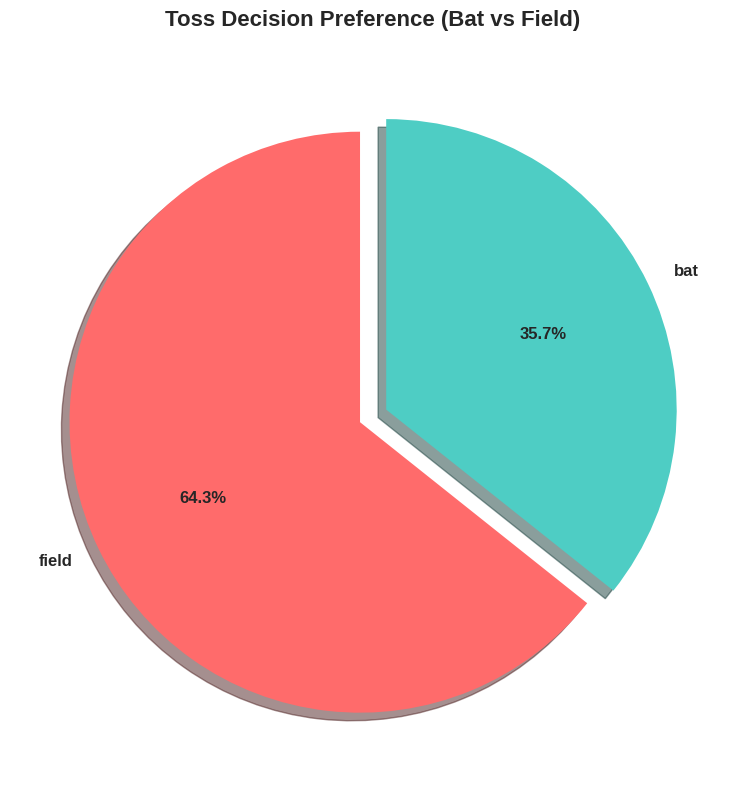

✓ Saved: 03_toss_decision_distribution.png


In [ ]:
# ============================================================================
# STEP 10: VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("STEP 10: DATA VISUALIZATIONS")
print("="*80)

# Set up the plotting style
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# 10.1: Matches Per Season
print("\n--- Creating Visualization 1: Matches Per Season ---")
fig, ax = plt.subplots(figsize=(14, 6))
matches_per_season = df_cleaned['season'].value_counts().sort_index()
ax.bar(matches_per_season.index, matches_per_season.values, color='steelblue', edgecolor='black')
ax.set_xlabel('Season', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_title('IPL Matches Per Season', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('01_matches_per_season.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 01_matches_per_season.png")

# 10.2: Top 10 Teams by Total Wins
print("\n--- Creating Visualization 2: Top Teams by Wins ---")
fig, ax = plt.subplots(figsize=(14, 6))
top_10_teams = df_cleaned['winner'].value_counts().head(10)
colors = sns.color_palette('viridis', len(top_10_teams))
ax.barh(top_10_teams.index, top_10_teams.values, color=colors, edgecolor='black')
ax.set_xlabel('Total Wins', fontsize=12, fontweight='bold')
ax.set_ylabel('Team', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Teams by Total Wins in IPL', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('02_top_teams_wins.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 02_top_teams_wins.png")

# 10.3: Toss Decision Distribution
print("\n--- Creating Visualization 3: Toss Decision Distribution ---")
fig, ax = plt.subplots(figsize=(10, 8))
toss_decision_counts = df_cleaned['toss_decision'].value_counts()
colors_pie = ['#FF6B6B', '#4ECDC4']
explode = (0.05, 0.05)
ax.pie(toss_decision_counts.values, labels=toss_decision_counts.index, autopct='%1.1f%%',
       startangle=90, colors=colors_pie, explode=explode, shadow=True,
       textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Toss Decision Preference (Bat vs Field)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('03_toss_decision_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 03_toss_decision_distribution.png")


--- Creating Visualization 4: Win by Result Type ---


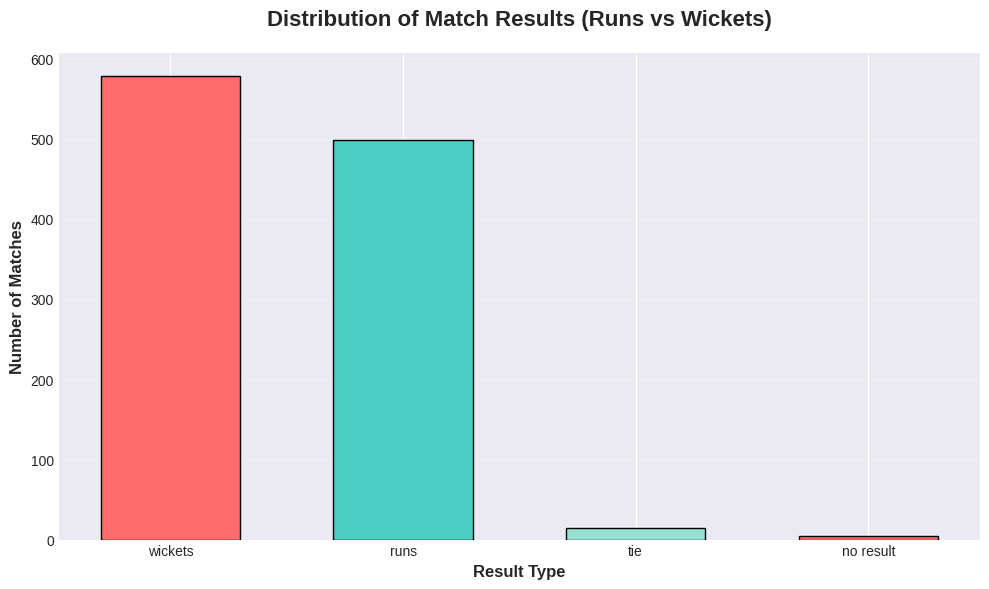

✓ Saved: 04_result_type_distribution.png

--- Creating Visualization 5: Top Players by Awards ---


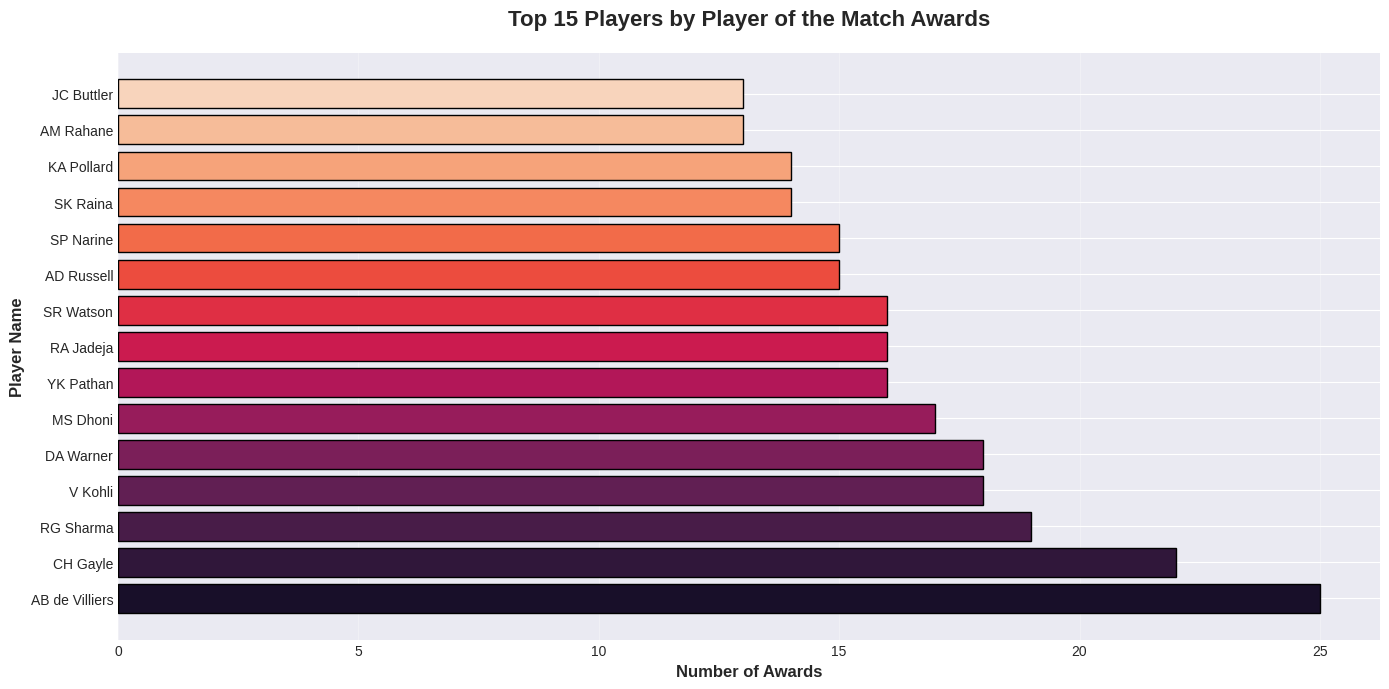

✓ Saved: 05_top_players_awards.png

--- Creating Visualization 6: Top Venues ---


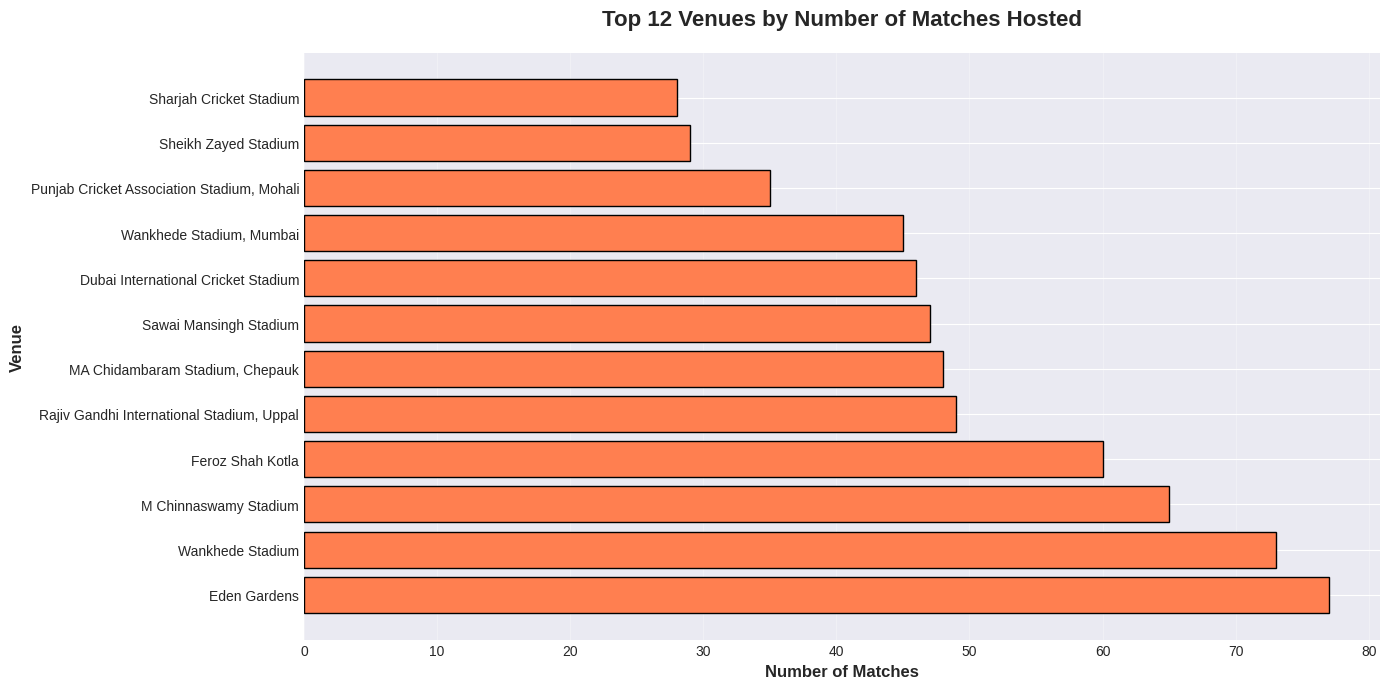

✓ Saved: 06_top_venues.png

--- Creating Visualization 7: Toss Impact Analysis ---


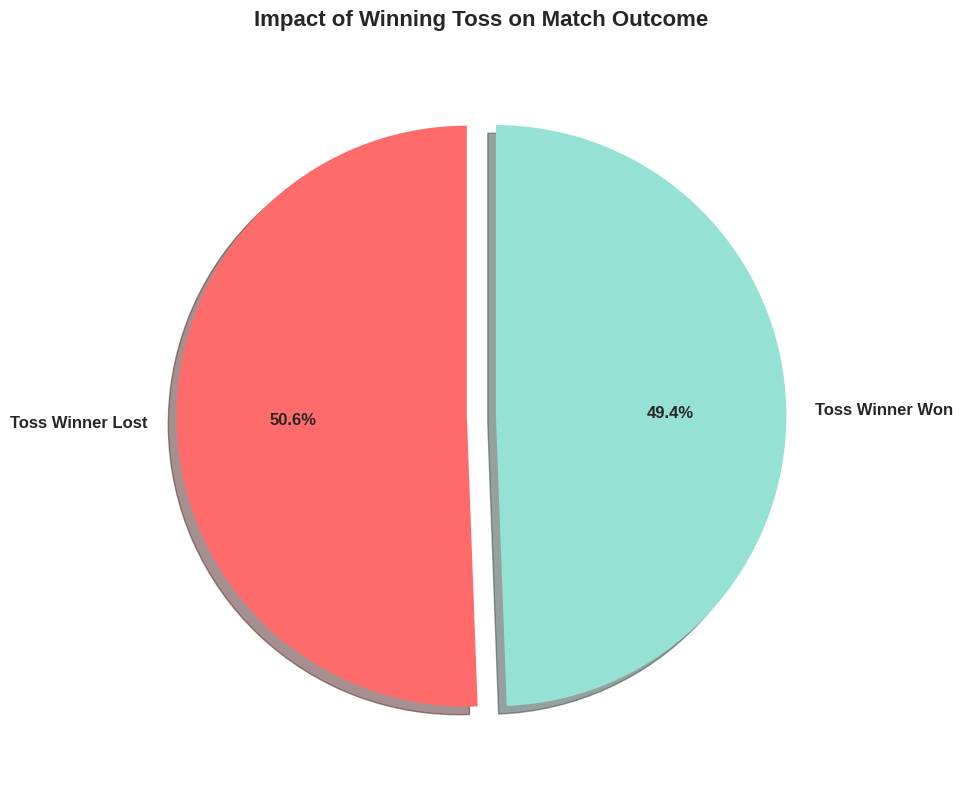

✓ Saved: 07_toss_impact.png


In [ ]:
# 10.4: Win by Result Type
print("\n--- Creating Visualization 4: Win by Result Type ---")
fig, ax = plt.subplots(figsize=(10, 6))
result_counts = df_cleaned['result'].value_counts()
ax.bar(result_counts.index, result_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'],
       edgecolor='black', width=0.6)
ax.set_xlabel('Result Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Match Results (Runs vs Wickets)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('04_result_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 04_result_type_distribution.png")

# 10.5: Top Player of the Match Winners
print("\n--- Creating Visualization 5: Top Players by Awards ---")
fig, ax = plt.subplots(figsize=(14, 7))
top_15_players = df_cleaned['player_of_match'].value_counts().head(15)
colors = sns.color_palette('rocket', len(top_15_players))
ax.barh(top_15_players.index, top_15_players.values, color=colors, edgecolor='black')
ax.set_xlabel('Number of Awards', fontsize=12, fontweight='bold')
ax.set_ylabel('Player Name', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Players by Player of the Match Awards', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('05_top_players_awards.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 05_top_players_awards.png")

# 10.6: Top Venues by Number of Matches
print("\n--- Creating Visualization 6: Top Venues ---")
fig, ax = plt.subplots(figsize=(14, 7))
top_12_venues = df_cleaned['venue'].value_counts().head(12)
ax.barh(top_12_venues.index, top_12_venues.values, color='coral', edgecolor='black')
ax.set_xlabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_ylabel('Venue', fontsize=12, fontweight='bold')
ax.set_title('Top 12 Venues by Number of Matches Hosted', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('06_top_venues.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 06_top_venues.png")

# 10.7: Toss Impact on Match Outcome
print("\n--- Creating Visualization 7: Toss Impact Analysis ---")
fig, ax = plt.subplots(figsize=(10, 8))
toss_impact_data = df_cleaned['toss_winner_is_match_winner'].value_counts()
labels = ['Toss Winner Lost', 'Toss Winner Won']
colors = ['#FF6B6B', '#95E1D3']
explode = (0.05, 0.05)
ax.pie(toss_impact_data.values, labels=labels, autopct='%1.1f%%',
       startangle=90, colors=colors, explode=explode, shadow=True,
       textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Impact of Winning Toss on Match Outcome', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('07_toss_impact.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 07_toss_impact.png")


--- Creating Visualization 8: Win Percentage Analysis ---


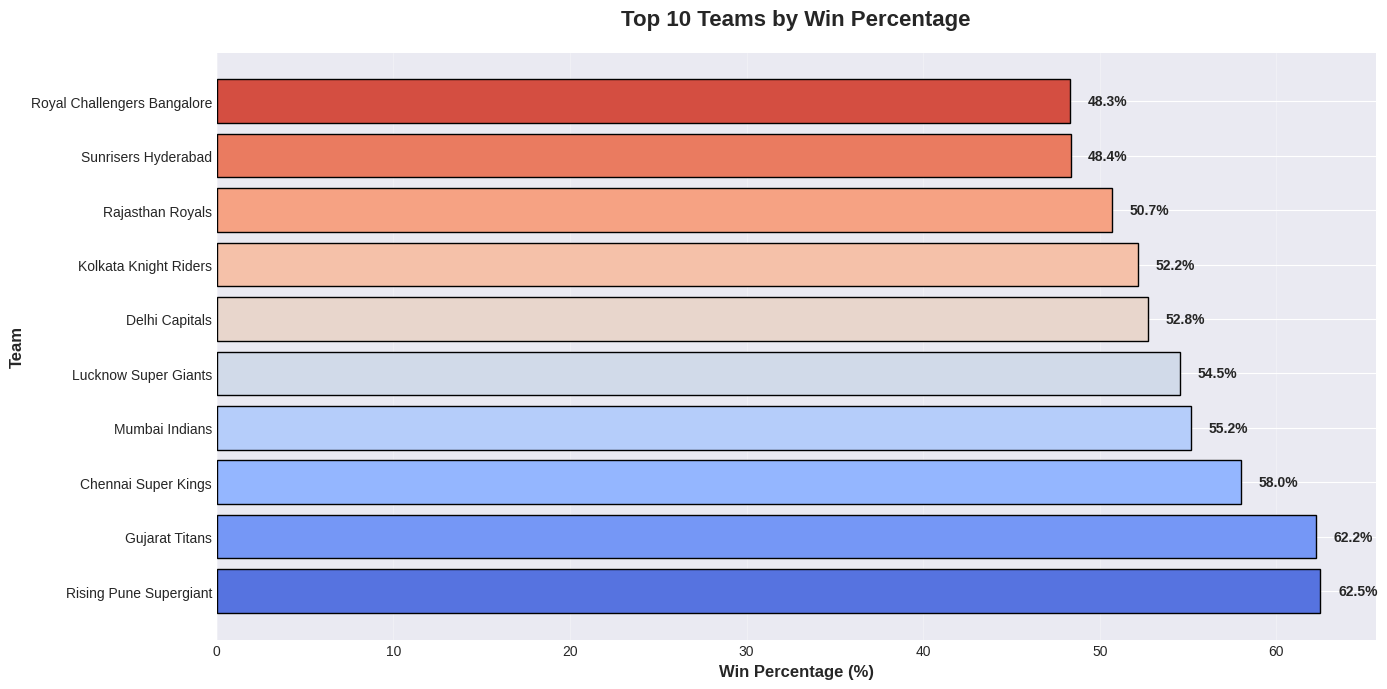

✓ Saved: 08_win_percentage_teams.png

--- Creating Visualization 9: Seasonal Distribution ---


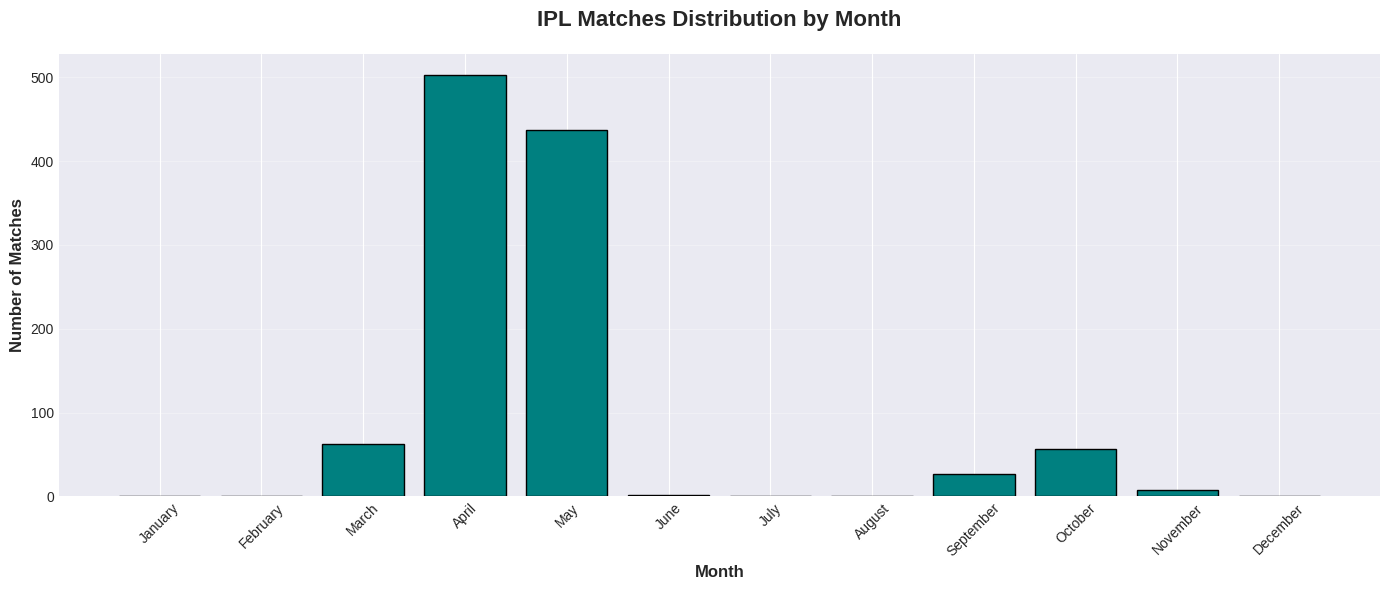

✓ Saved: 09_matches_by_month.png

--- Creating Visualization 10: Day of Week Distribution ---


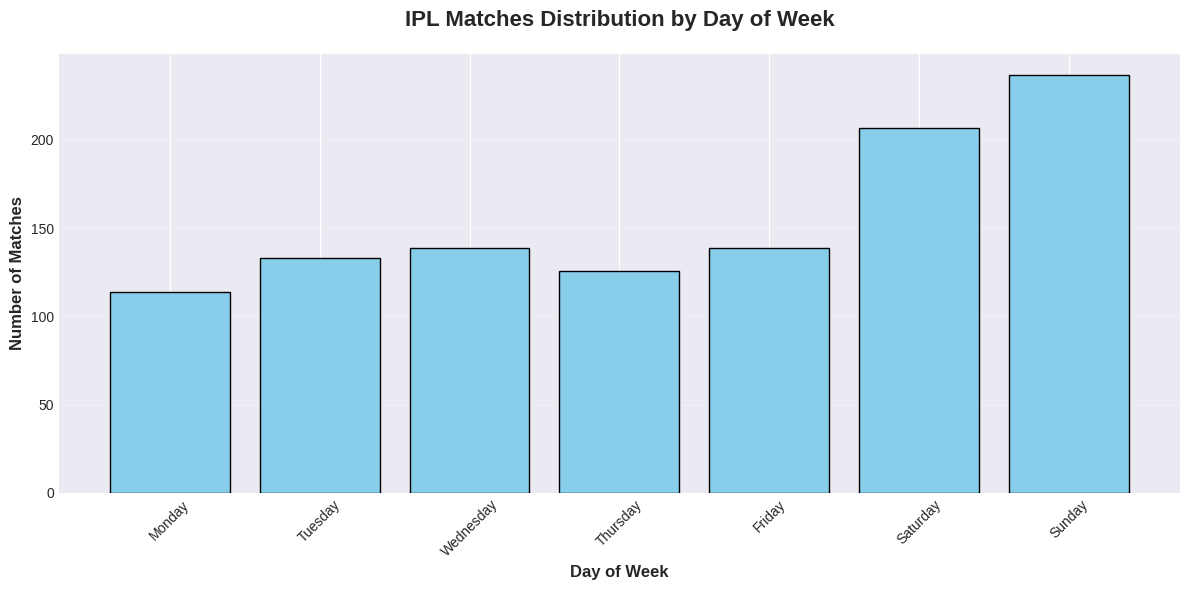

✓ Saved: 10_matches_by_day.png


In [ ]:
# 10.8: Win Percentage by Team (Top 10)
print("\n--- Creating Visualization 8: Win Percentage Analysis ---")
fig, ax = plt.subplots(figsize=(14, 7))
top_10_win_pct = team_stats_df.head(10)
colors = sns.color_palette('coolwarm', len(top_10_win_pct))
bars = ax.barh(top_10_win_pct['Team'], top_10_win_pct['Win_Percentage'], color=colors, edgecolor='black')
ax.set_xlabel('Win Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Team', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Teams by Win Percentage', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('08_win_percentage_teams.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 08_win_percentage_teams.png")

# 10.9: Matches by Month
print("\n--- Creating Visualization 9: Seasonal Distribution ---")
fig, ax = plt.subplots(figsize=(14, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df_cleaned['month_name'].value_counts().reindex(month_order, fill_value=0)
ax.bar(month_counts.index, month_counts.values, color='teal', edgecolor='black')
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_title('IPL Matches Distribution by Month', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('09_matches_by_month.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 09_matches_by_month.png")

# 10.10: Day of Week Analysis
print("\n--- Creating Visualization 10: Day of Week Distribution ---")
fig, ax = plt.subplots(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_cleaned['day_of_week'].value_counts().reindex(day_order, fill_value=0)
ax.bar(day_counts.index, day_counts.values, color='skyblue', edgecolor='black')
ax.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=12, fontweight='bold')
ax.set_title('IPL Matches Distribution by Day of Week', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('10_matches_by_day.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 10_matches_by_day.png")


--- Creating Visualization 11: Correlation Analysis ---


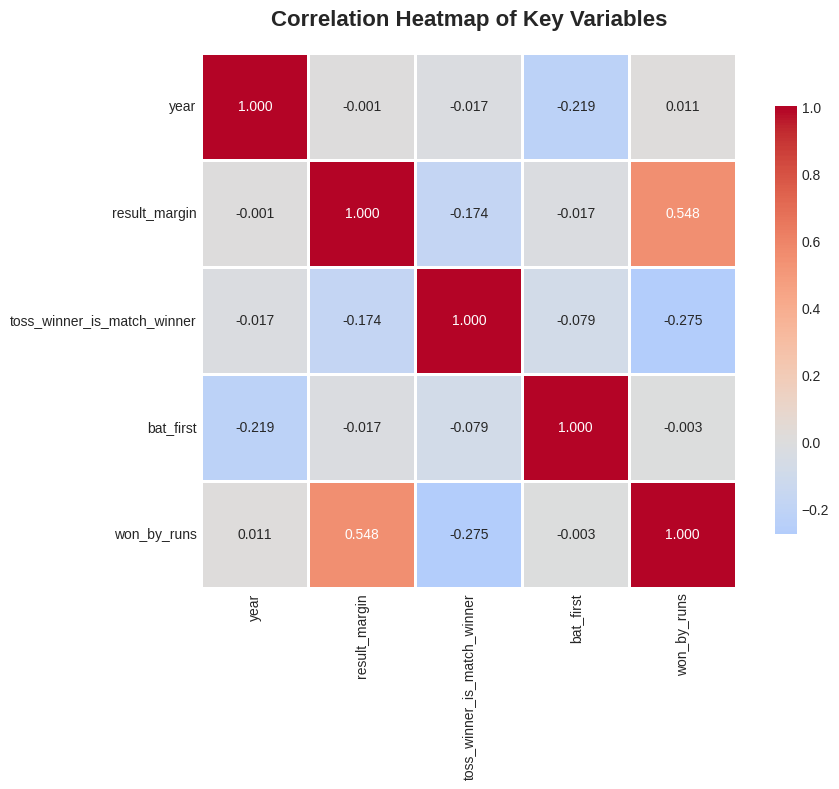

✓ Saved: 11_correlation_heatmap.png

--- Creating Visualization 12: Winning Margin Analysis ---


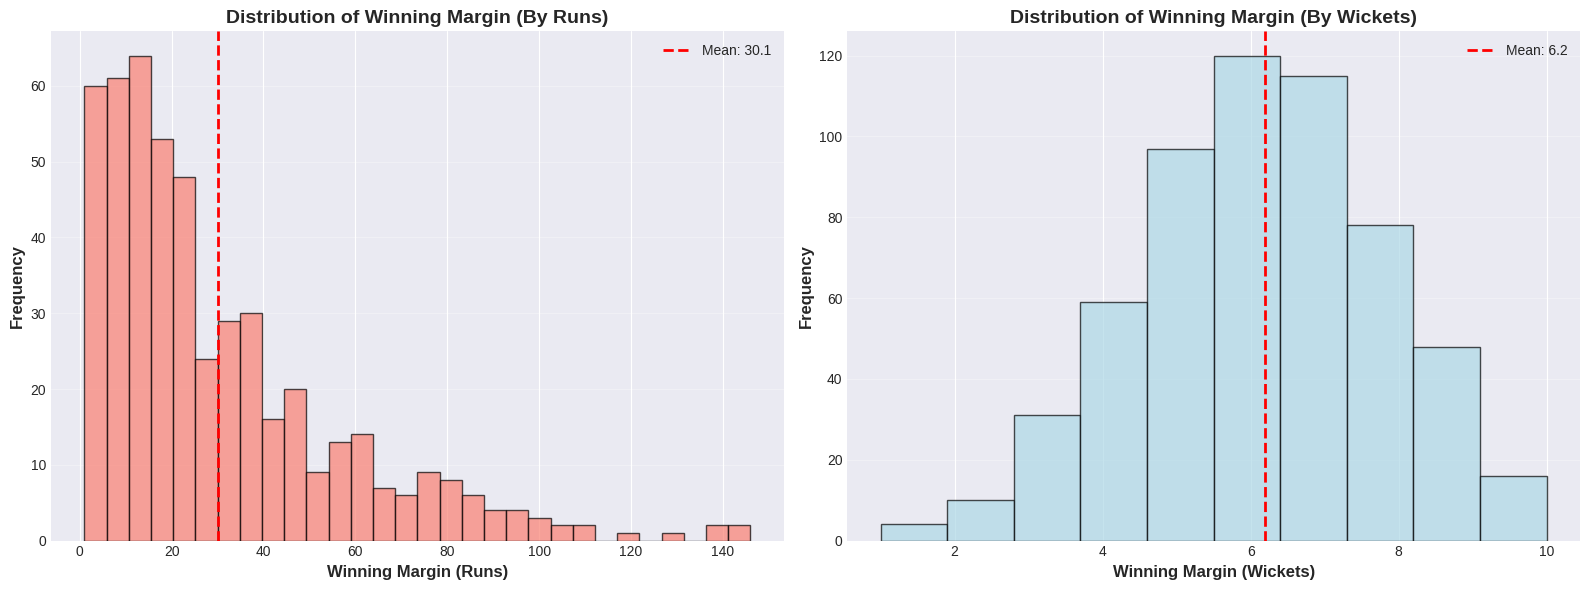

✓ Saved: 12_winning_margin_distribution.png


In [ ]:
# 10.11: Correlation Heatmap
print("\n--- Creating Visualization 11: Correlation Analysis ---")
# Create numerical features for correlation
corr_df = df_cleaned[['year', 'result_margin', 'toss_winner_is_match_winner']].copy()
corr_df['bat_first'] = (df_cleaned['toss_decision'] == 'bat').astype(int)
corr_df['won_by_runs'] = (df_cleaned['result'] == 'runs').astype(int)

fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax, fmt='.3f')
ax.set_title('Correlation Heatmap of Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('11_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 11_correlation_heatmap.png")

# 10.12: Winning Margin Distribution
print("\n--- Creating Visualization 12: Winning Margin Analysis ---")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# By Runs
runs_margin = df_cleaned[df_cleaned['result'] == 'runs']['result_margin']
ax1.hist(runs_margin, bins=30, color='salmon', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Winning Margin (Runs)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Winning Margin (By Runs)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
ax1.axvline(runs_margin.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {runs_margin.mean():.1f}')
ax1.legend()

# By Wickets
wickets_margin = df_cleaned[df_cleaned['result'] == 'wickets']['result_margin']
ax2.hist(wickets_margin, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Winning Margin (Wickets)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Winning Margin (By Wickets)', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.axvline(wickets_margin.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {wickets_margin.mean():.1f}')
ax2.legend()

plt.tight_layout()
plt.savefig('12_winning_margin_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 12_winning_margin_distribution.png")

In [ ]:
# ============================================================================
# STEP 11: KEY INSIGHTS & SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*80)
print("STEP 11: KEY INSIGHTS & SUMMARY")
print("="*80)

print("\n📊 IPL DATA ANALYSIS - KEY FINDINGS")
print("="*80)

# 1. Overall Statistics
print("\n1. OVERALL STATISTICS:")
print(f"   • Total Matches Analyzed: {len(df_cleaned)}")
print(f"   • Total Unique Teams: {df_cleaned['team1'].nunique()}")
print(f"   • Total Venues: {df_cleaned['venue'].nunique()}")
print(f"   • Total Cities: {df_cleaned['city'].nunique()}")
print(f"   • Seasons Covered: {df_cleaned['season'].min()} to {df_cleaned['season'].max()}")
print(f"   • Date Range: {df_cleaned['date'].min().strftime('%Y-%m-%d')} to {df_cleaned['date'].max().strftime('%Y-%m-%d')}")

# 2. Most Successful Team
most_successful_team = df_cleaned['winner'].value_counts().index[0]
most_successful_wins = df_cleaned['winner'].value_counts().values[0]
print(f"\n2. MOST SUCCESSFUL TEAM:")
print(f"   • Team: {most_successful_team}")
print(f"   • Total Wins: {most_successful_wins}")

# 3. Top Performer
top_player = df_cleaned['player_of_match'].value_counts().index[0]
top_player_awards = df_cleaned['player_of_match'].value_counts().values[0]
print(f"\n3. TOP PERFORMER:")
print(f"   • Player: {top_player}")
print(f"   • Player of Match Awards: {top_player_awards}")

# 4. Toss Impact
toss_win_match_pct = df_cleaned['toss_winner_is_match_winner'].mean() * 100
print(f"\n4. TOSS IMPACT:")
print(f"   • Toss winners won match: {toss_win_match_pct:.2f}%")
print(f"   • Toss advantage: {'Significant' if toss_win_match_pct > 55 else 'Moderate' if toss_win_match_pct > 50 else 'Minimal'}")

# 5. Toss Decision
bat_first_pct = (df_cleaned['toss_decision'].value_counts().get('bat', 0) / len(df_cleaned)) * 100
print(f"\n5. TOSS DECISION PREFERENCE:")
print(f"   • Teams choosing to bat first: {bat_first_pct:.2f}%")
print(f"   • Teams choosing to field first: {100-bat_first_pct:.2f}%")

# 6. Match Results
wins_by_runs = len(df_cleaned[df_cleaned['result'] == 'runs'])
wins_by_wickets = len(df_cleaned[df_cleaned['result'] == 'wickets'])
print(f"\n6. MATCH RESULT PATTERNS:")
print(f"   • Wins by Runs: {wins_by_runs} ({wins_by_runs/len(df_cleaned)*100:.1f}%)")
print(f"   • Wins by Wickets: {wins_by_wickets} ({wins_by_wickets/len(df_cleaned)*100:.1f}%)")

# 7. Most Popular Venue
most_popular_venue = df_cleaned['venue'].value_counts().index[0]
matches_at_venue = df_cleaned['venue'].value_counts().values[0]
print(f"\n7. MOST POPULAR VENUE:")
print(f"   • Venue: {most_popular_venue}")
print(f"   • Matches Hosted: {matches_at_venue}")

# 8. Average Winning Margins
avg_runs_margin = df_cleaned[df_cleaned['result'] == 'runs']['result_margin'].mean()
avg_wickets_margin = df_cleaned[df_cleaned['result'] == 'wickets']['result_margin'].mean()
print(f"\n8. AVERAGE WINNING MARGINS:")
print(f"   • By Runs: {avg_runs_margin:.2f} runs")
print(f"   • By Wickets: {avg_wickets_margin:.2f} wickets")

# 9. Peak Season
peak_season = df_cleaned['season'].value_counts().index[0]
peak_season_matches = df_cleaned['season'].value_counts().values[0]
print(f"\n9. PEAK SEASON:")
print(f"   • Season: {peak_season}")
print(f"   • Matches Played: {peak_season_matches}")

# 10. Most Common Match Day
most_common_day = df_cleaned['day_of_week'].value_counts().index[0]
print(f"\n10. MATCH SCHEDULING:")
print(f"    • Most common day: {most_common_day}")
print(f"    • Most common month: {df_cleaned['month_name'].value_counts().index[0]}")



STEP 11: KEY INSIGHTS & SUMMARY

📊 IPL DATA ANALYSIS - KEY FINDINGS

1. OVERALL STATISTICS:
   • Total Matches Analyzed: 1095
   • Total Unique Teams: 19
   • Total Venues: 58
   • Total Cities: 37
   • Seasons Covered: 2007/08 to 2024
   • Date Range: 2008-04-18 to 2024-05-26

2. MOST SUCCESSFUL TEAM:
   • Team: Mumbai Indians
   • Total Wins: 144

3. TOP PERFORMER:
   • Player: AB de Villiers
   • Player of Match Awards: 25

4. TOSS IMPACT:
   • Toss winners won match: 50.59%
   • Toss advantage: Moderate

5. TOSS DECISION PREFERENCE:
   • Teams choosing to bat first: 35.71%
   • Teams choosing to field first: 64.29%

6. MATCH RESULT PATTERNS:
   • Wins by Runs: 498 (45.5%)
   • Wins by Wickets: 578 (52.8%)

7. MOST POPULAR VENUE:
   • Venue: Eden Gardens
   • Matches Hosted: 77

8. AVERAGE WINNING MARGINS:
   • By Runs: 30.10 runs
   • By Wickets: 6.19 wickets

9. PEAK SEASON:
   • Season: 2013
   • Matches Played: 76

10. MATCH SCHEDULING:
    • Most common day: Sunday
    • Most 

In [ ]:
# ============================================================================
# STEP 12: EXPORT PROCESSED DATA & SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("STEP 12: EXPORTING RESULTS")
print("="*80)

# Export cleaned dataset
df_cleaned.to_csv('IPL_cleaned_data.csv', index=False)
print("✓ Exported: IPL_cleaned_data.csv")

# Export team statistics
team_stats_df.to_csv('IPL_team_statistics.csv', index=False)
print("✓ Exported: IPL_team_statistics.csv")

# Create summary report
with open('IPL_Analysis_Summary_Report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("IPL DATA ANALYSIS - COMPREHENSIVE SUMMARY REPORT\n")
    f.write("="*80 + "\n\n")

    f.write("PROJECT OVERVIEW:\n")
    f.write("-" * 80 + "\n")
    f.write(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Dataset: IPL Matches (2008-2024)\n")
    f.write(f"Total Records Analyzed: {len(df_cleaned)}\n\n")

    f.write("KEY FINDINGS:\n")
    f.write("-" * 80 + "\n")
    f.write(f"1. Most Successful Team: {most_successful_team} ({most_successful_wins} wins)\n")
    f.write(f"2. Top Performer: {top_player} ({top_player_awards} awards)\n")
    f.write(f"3. Toss Win to Match Win Rate: {toss_win_match_pct:.2f}%\n")
    f.write(f"4. Most Popular Venue: {most_popular_venue} ({matches_at_venue} matches)\n")
    f.write(f"5. Average Win by Runs: {avg_runs_margin:.2f} runs\n")
    f.write(f"6. Average Win by Wickets: {avg_wickets_margin:.2f} wickets\n\n")

    f.write("TOP 5 TEAMS BY WIN PERCENTAGE:\n")
    f.write("-" * 80 + "\n")
    for idx, row in team_stats_df.head(5).iterrows():
        f.write(f"{row['Team']}: {row['Win_Percentage']:.2f}% ({row['Wins']}/{row['Matches_Played']} matches)\n")

    f.write("\n" + "="*80 + "\n")
    f.write("END OF REPORT\n")
    f.write("="*80 + "\n")

print("✓ Exported: IPL_Analysis_Summary_Report.txt")


# ============================================================================
# FINAL MESSAGE
# ============================================================================
print("\n" + "="*80)
print("✅ IPL DATA ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nAll analyses, visualizations, and reports have been generated!")
print("\nGenerated Files:")
print("  📊 12 Visualization PNG files")
print("  📁 IPL_cleaned_data.csv")
print("  📁 IPL_team_statistics.csv")
print("  📄 IPL_Analysis_Summary_Report.txt")
print("\n" + "="*80)


STEP 12: EXPORTING RESULTS
✓ Exported: IPL_cleaned_data.csv
✓ Exported: IPL_team_statistics.csv
✓ Exported: IPL_Analysis_Summary_Report.txt

✅ IPL DATA ANALYSIS COMPLETED SUCCESSFULLY!

All analyses, visualizations, and reports have been generated!

Generated Files:
  📊 12 Visualization PNG files
  📁 IPL_cleaned_data.csv
  📁 IPL_team_statistics.csv
  📄 IPL_Analysis_Summary_Report.txt



VIZ 13: Team Performance Trends Over Time


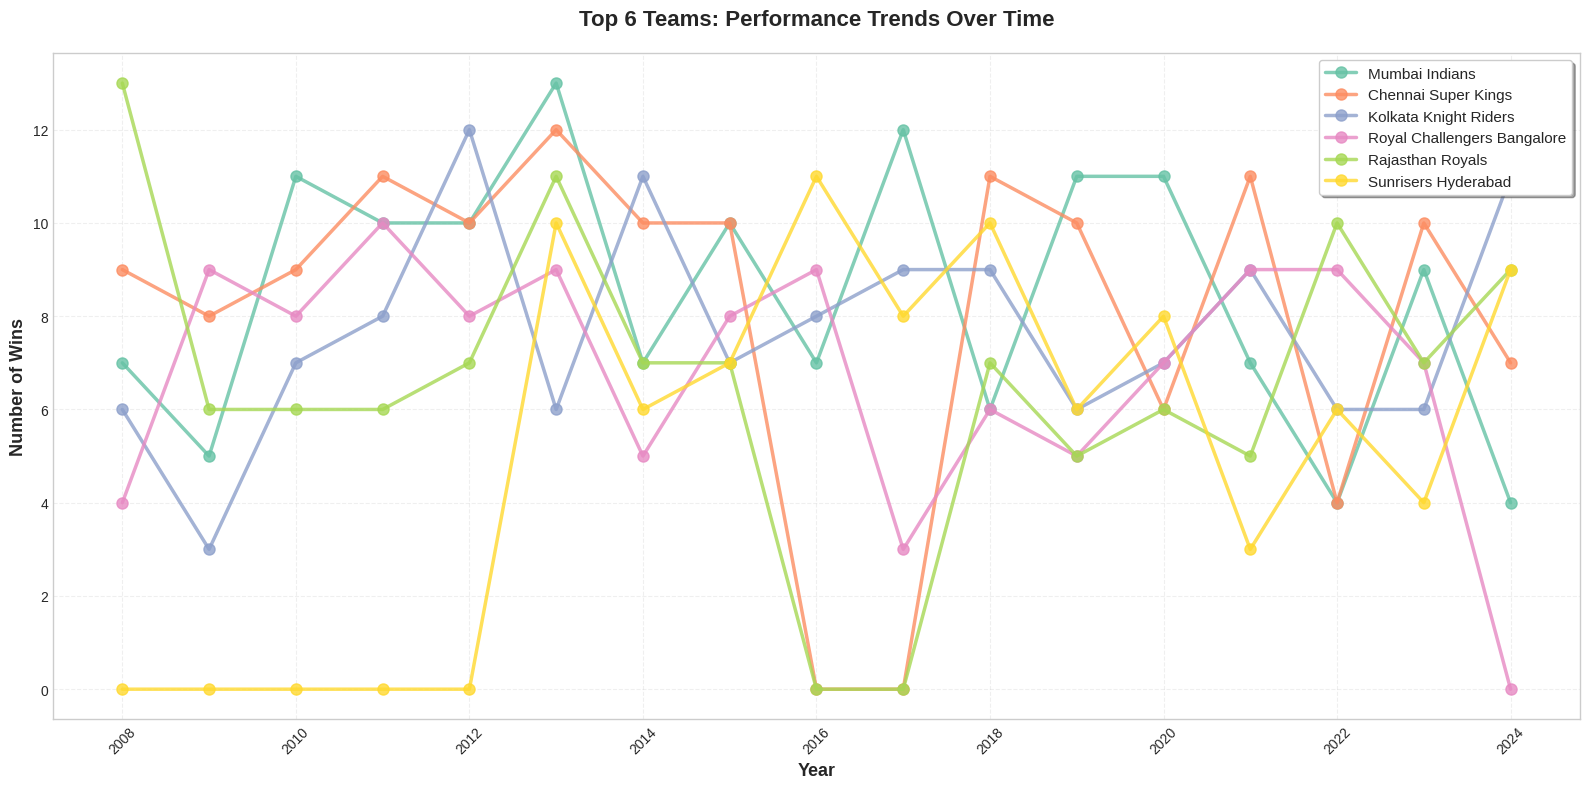

✓ Saved: viz_13_team_trends_over_time.png



In [ ]:
# ============================================================================
# VISUALIZATION 13: TEAM PERFORMANCE TREND OVER YEARS (LINE CHART)
# ============================================================================
print("="*80)
print("VIZ 13: Team Performance Trends Over Time")
print("="*80)

# Get top 6 teams by total wins
top_6_teams = df_cleaned['winner'].value_counts().head(6).index.tolist()

# Calculate wins per year for top teams
team_yearly_wins = []
for team in top_6_teams:
    for year in sorted(df_cleaned['year'].unique()):
        wins = len(df_cleaned[(df_cleaned['winner'] == team) & (df_cleaned['year'] == year)])
        team_yearly_wins.append({'Team': team, 'Year': year, 'Wins': wins})

team_trends_df = pd.DataFrame(team_yearly_wins)

# Create line chart
fig, ax = plt.subplots(figsize=(16, 8))
for team in top_6_teams:
    team_data = team_trends_df[team_trends_df['Team'] == team]
    ax.plot(team_data['Year'], team_data['Wins'], marker='o',
            linewidth=2.5, markersize=8, label=team, alpha=0.8)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Wins', fontsize=13, fontweight='bold')
ax.set_title('Top 6 Teams: Performance Trends Over Time',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('viz_13_team_trends_over_time.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_13_team_trends_over_time.png\n")

VIZ 14: Win-Loss Comparison (Stacked Bar Chart)


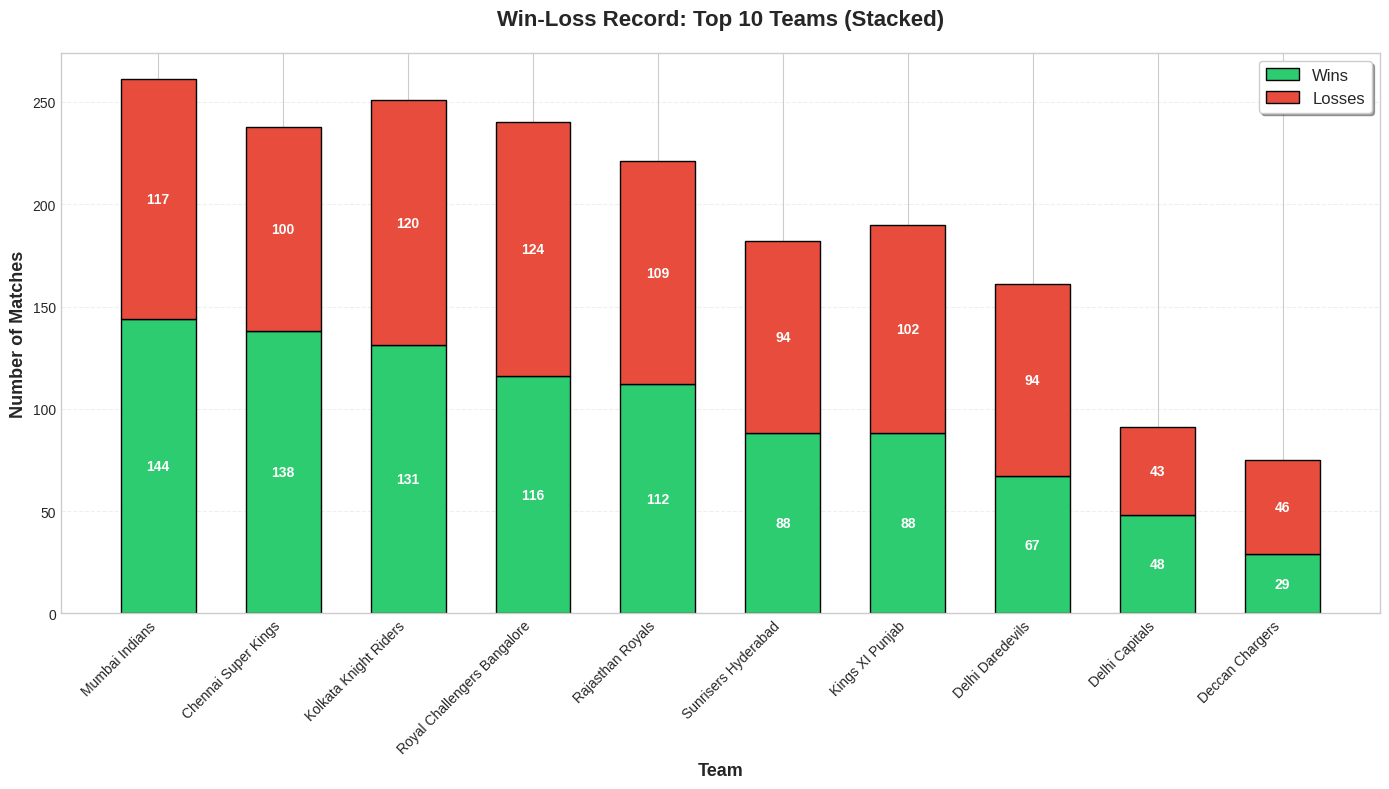

✓ Saved: viz_14_win_loss_stacked.png



In [ ]:
# ============================================================================
# VISUALIZATION 14: WIN-LOSS STACKED BAR CHART BY TEAM
# ============================================================================
print("="*80)
print("VIZ 14: Win-Loss Comparison (Stacked Bar Chart)")
print("="*80)

# Calculate wins and losses for top 10 teams
all_teams = set(df['team1'].unique()) | set(df['team2'].unique())
all_teams = {t for t in all_teams if pd.notna(t)}

team_records = []
for team in all_teams:
    matches = len(df[(df['team1'] == team) | (df['team2'] == team)])
    wins = len(df[df['winner'] == team])
    losses = matches - wins
    team_records.append({'Team': team, 'Wins': wins, 'Losses': losses, 'Total': matches})

team_df = pd.DataFrame(team_records).sort_values('Wins', ascending=False).head(10)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(team_df))
width = 0.6

bars1 = ax.bar(x, team_df['Wins'], width, label='Wins', color='#2ecc71', edgecolor='black')
bars2 = ax.bar(x, team_df['Losses'], width, bottom=team_df['Wins'],
               label='Losses', color='#e74c3c', edgecolor='black')

ax.set_xlabel('Team', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=13, fontweight='bold')
ax.set_title('Win-Loss Record: Top 10 Teams (Stacked)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(team_df['Team'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    wins = team_df.iloc[i]['Wins']
    losses = team_df.iloc[i]['Losses']
    ax.text(bar1.get_x() + bar1.get_width()/2, wins/2, str(wins),
            ha='center', va='center', fontweight='bold', fontsize=10, color='white')
    ax.text(bar2.get_x() + bar2.get_width()/2, wins + losses/2, str(losses),
            ha='center', va='center', fontweight='bold', fontsize=10, color='white')

plt.tight_layout()
plt.savefig('viz_14_win_loss_stacked.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_14_win_loss_stacked.png\n")


VIZ 15: Winning Margins Distribution (Box Plot)


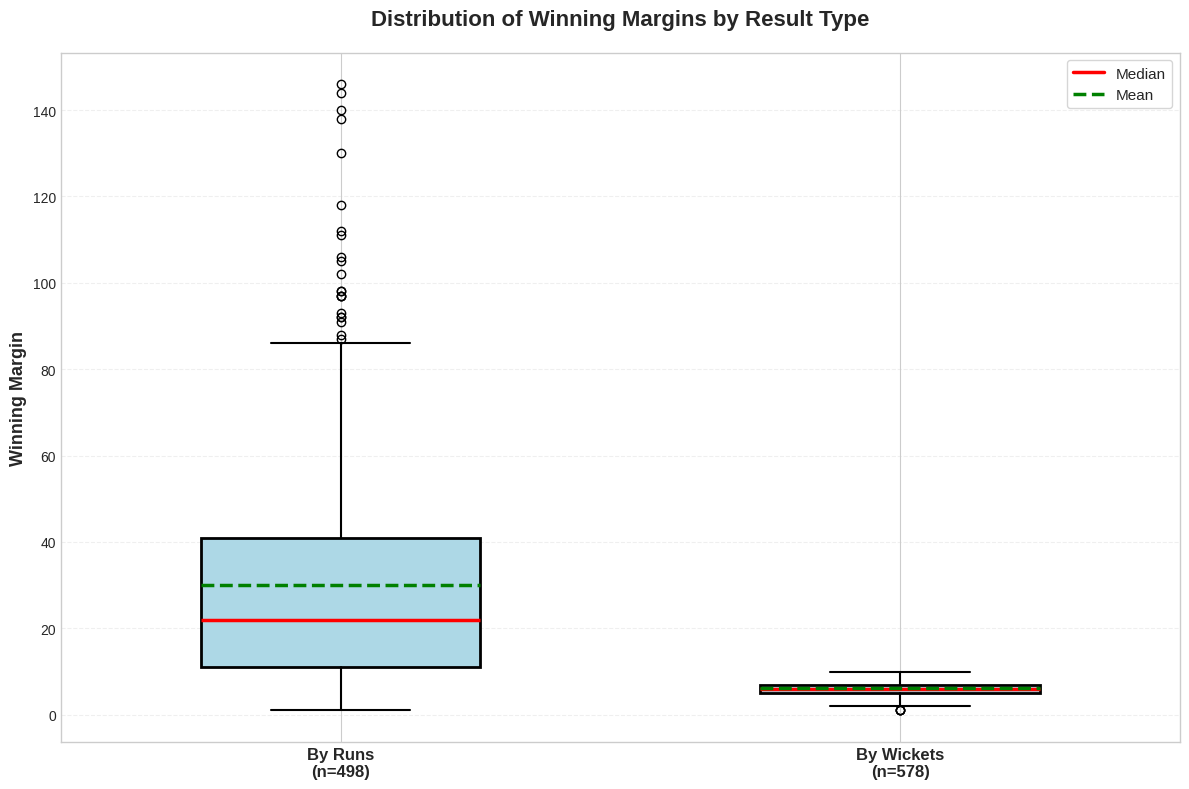

✓ Saved: viz_15_winning_margins_boxplot.png



In [ ]:
# ============================================================================
# VISUALIZATION 15: BOX PLOT - WINNING MARGINS DISTRIBUTION
# ============================================================================
print("="*80)
print("VIZ 15: Winning Margins Distribution (Box Plot)")
print("="*80)

fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for box plot
runs_data = df[df['result'] == 'runs']['result_margin'].dropna()
wickets_data = df[df['result'] == 'wickets']['result_margin'].dropna()

box_data = [runs_data, wickets_data]
positions = [1, 2]
labels = [f'By Runs\n(n={len(runs_data)})', f'By Wickets\n(n={len(wickets_data)})']

bp = ax.boxplot(box_data, positions=positions, widths=0.5, patch_artist=True,
                showmeans=True, meanline=True,
                boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=2),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5),
                medianprops=dict(color='red', linewidth=2.5),
                meanprops=dict(color='green', linewidth=2.5, linestyle='--'))

ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.set_ylabel('Winning Margin', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Winning Margins by Result Type',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', linewidth=2.5, label='Median'),
    Line2D([0], [0], color='green', linewidth=2.5, linestyle='--', label='Mean')
]
ax.legend(handles=legend_elements, fontsize=11, loc='upper right', frameon=True)

plt.tight_layout()
plt.savefig('viz_15_winning_margins_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_15_winning_margins_boxplot.png\n")

VIZ 16: Bat First vs Field First Success Rate


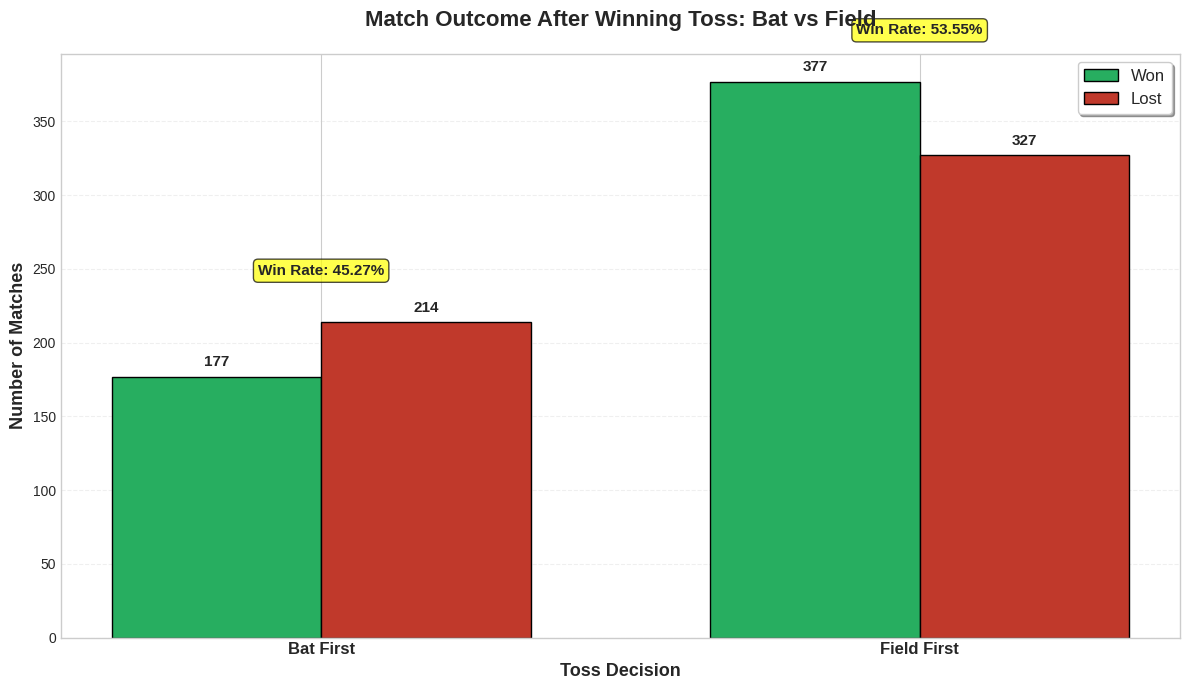

✓ Saved: viz_16_bat_vs_field_grouped.png



In [ ]:
# ============================================================================
# VISUALIZATION 16: GROUPED BAR CHART - BAT VS FIELD SUCCESS
# ============================================================================
print("="*80)
print("VIZ 16: Bat First vs Field First Success Rate")
print("="*80)

# Calculate success rates
toss_analysis = df_cleaned.groupby('toss_decision')['toss_winner_is_match_winner'].value_counts().unstack(fill_value=0)

toss_analysis.columns = ['Lost', 'Won']
toss_analysis['Total'] = toss_analysis['Lost'] + toss_analysis['Won']
toss_analysis['Win_Rate'] = (toss_analysis['Won'] / toss_analysis['Total'] * 100).round(2)

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(toss_analysis))
width = 0.35

bars1 = ax.bar(x - width/2, toss_analysis['Won'], width, label='Won',
               color='#27ae60', edgecolor='black')
bars2 = ax.bar(x + width/2, toss_analysis['Lost'], width, label='Lost',
               color='#c0392b', edgecolor='black')

ax.set_xlabel('Toss Decision', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=13, fontweight='bold')
ax.set_title('Match Outcome After Winning Toss: Bat vs Field',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(['Bat First', 'Field First'], fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels and win rates
for i, (bars_w, bars_l) in enumerate(zip(bars1, bars2)):
    won_val = toss_analysis['Won'].iloc[i]
    lost_val = toss_analysis['Lost'].iloc[i]
    win_rate = toss_analysis['Win_Rate'].iloc[i]

    ax.text(bars_w.get_x() + bars_w.get_width()/2, won_val + 5,
            str(int(won_val)), ha='center', va='bottom', fontweight='bold', fontsize=11)
    ax.text(bars_l.get_x() + bars_l.get_width()/2, lost_val + 5,
            str(int(lost_val)), ha='center', va='bottom', fontweight='bold', fontsize=11)

    # Add win rate label
    ax.text(i, max(won_val, lost_val) + 30, f'Win Rate: {win_rate}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('viz_16_bat_vs_field_grouped.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_16_bat_vs_field_grouped.png\n")

VIZ 17: Cumulative IPL Growth Over Time


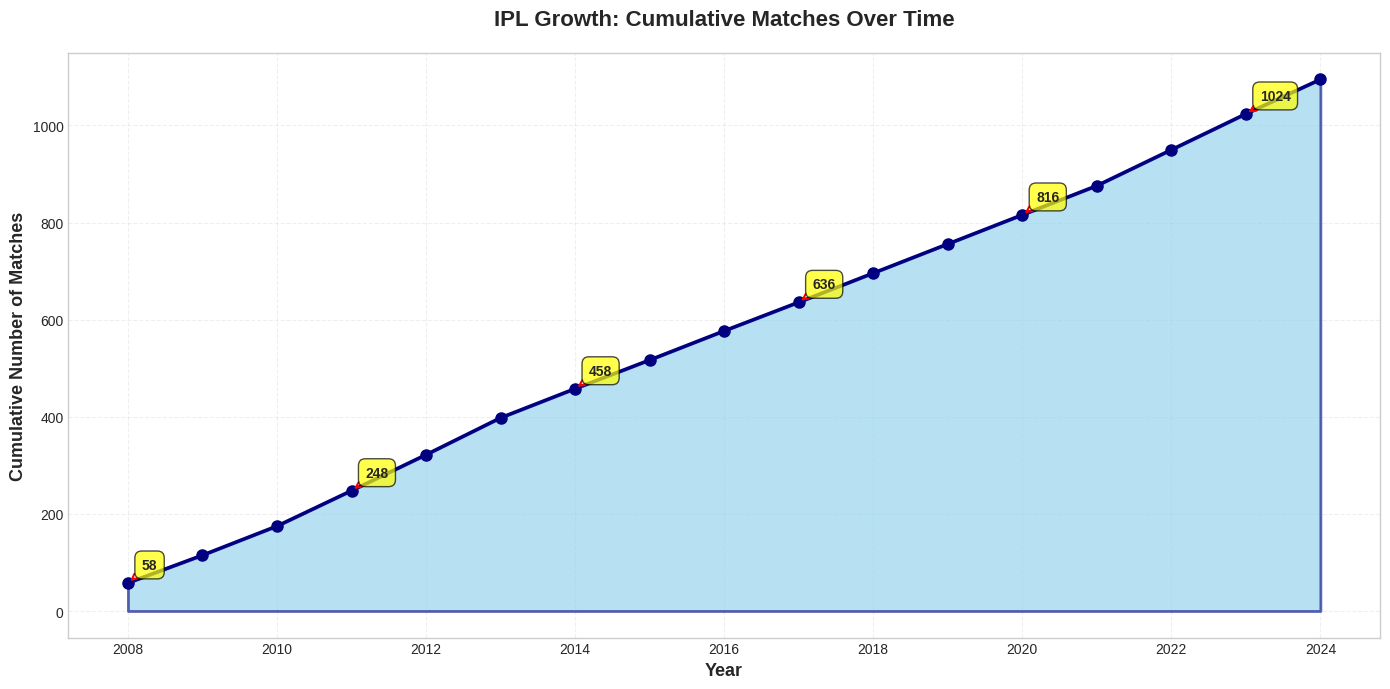

✓ Saved: viz_17_cumulative_growth.png



In [ ]:
# ============================================================================
# VISUALIZATION 17: CUMULATIVE MATCHES OVER TIME (AREA CHART)
# ============================================================================
print("="*80)
print("VIZ 17: Cumulative IPL Growth Over Time")
print("="*80)

# Calculate cumulative matches by year
yearly_matches = df_cleaned.groupby('year').size().reset_index(name='matches')
yearly_matches['cumulative'] = yearly_matches['matches'].cumsum()

fig, ax = plt.subplots(figsize=(14, 7))

# Area chart
ax.fill_between(yearly_matches['year'], yearly_matches['cumulative'],
                color='skyblue', alpha=0.6, edgecolor='navy', linewidth=2)
ax.plot(yearly_matches['year'], yearly_matches['cumulative'],
        color='navy', linewidth=2.5, marker='o', markersize=8)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Cumulative Number of Matches', fontsize=13, fontweight='bold')
ax.set_title('IPL Growth: Cumulative Matches Over Time',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

# Add annotations for milestone matches
for i in range(0, len(yearly_matches), 3):
    year = yearly_matches.iloc[i]['year']
    cumulative = yearly_matches.iloc[i]['cumulative']
    ax.annotate(f'{int(cumulative)}',
                xy=(year, cumulative),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0',
                               color='red', lw=1.5))

plt.tight_layout()
plt.savefig('viz_17_cumulative_growth.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_17_cumulative_growth.png\n")

VIZ 18: Winning Margin Trends Across Seasons (Violin Plot)


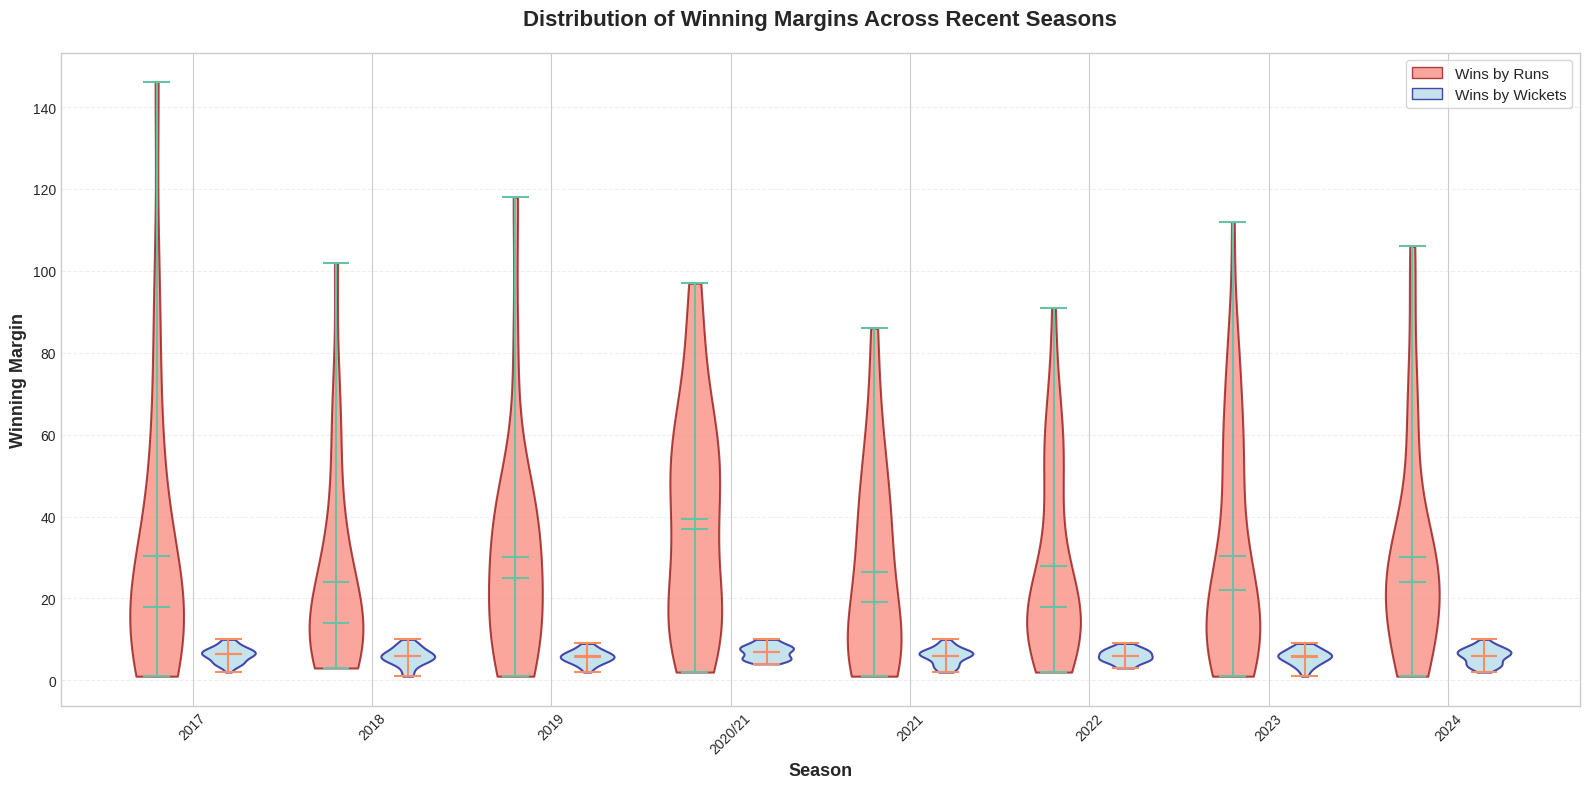

✓ Saved: viz_18_margins_violin_plot.png



In [ ]:
# ============================================================================
# VISUALIZATION 18: VIOLIN PLOT - RESULT MARGINS BY SEASON
# ============================================================================
print("="*80)
print("VIZ 18: Winning Margin Trends Across Seasons (Violin Plot)")
print("="*80)

# Get recent 8 seasons
recent_seasons = sorted(df['season'].unique())[-8:]
recent_df = df[df['season'].isin(recent_seasons)].copy()

fig, ax = plt.subplots(figsize=(16, 8))

# Separate by result type
runs_df = recent_df[recent_df['result'] == 'runs'][['season', 'result_margin']]
wickets_df = recent_df[recent_df['result'] == 'wickets'][['season', 'result_margin']]

# Prepare data for violin plot
positions_runs = np.arange(len(recent_seasons)) - 0.2
positions_wickets = np.arange(len(recent_seasons)) + 0.2

# Plot violins for runs
parts_runs = ax.violinplot([runs_df[runs_df['season'] == s]['result_margin'].dropna().values
                             for s in recent_seasons],
                            positions=positions_runs,
                            widths=0.3,
                            showmeans=True,
                            showmedians=True)

# Plot violins for wickets
parts_wickets = ax.violinplot([wickets_df[wickets_df['season'] == s]['result_margin'].dropna().values
                                for s in recent_seasons],
                               positions=positions_wickets,
                               widths=0.3,
                               showmeans=True,
                               showmedians=True)

# Color the violins
for pc in parts_runs['bodies']:
    pc.set_facecolor('salmon')
    pc.set_alpha(0.7)
    pc.set_edgecolor('darkred')
    pc.set_linewidth(1.5)

for pc in parts_wickets['bodies']:
    pc.set_facecolor('lightblue')
    pc.set_alpha(0.7)
    pc.set_edgecolor('darkblue')
    pc.set_linewidth(1.5)

ax.set_xlabel('Season', fontsize=13, fontweight='bold')
ax.set_ylabel('Winning Margin', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Winning Margins Across Recent Seasons',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(np.arange(len(recent_seasons)))
ax.set_xticklabels(recent_seasons, rotation=45)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='salmon', edgecolor='darkred', label='Wins by Runs', alpha=0.7),
    Patch(facecolor='lightblue', edgecolor='darkblue', label='Wins by Wickets', alpha=0.7)
]
ax.legend(handles=legend_elements, fontsize=11, loc='upper right', frameon=True)

plt.tight_layout()
plt.savefig('viz_18_margins_violin_plot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_18_margins_violin_plot.png\n")

VIZ 19: Team Experience vs Success Rate


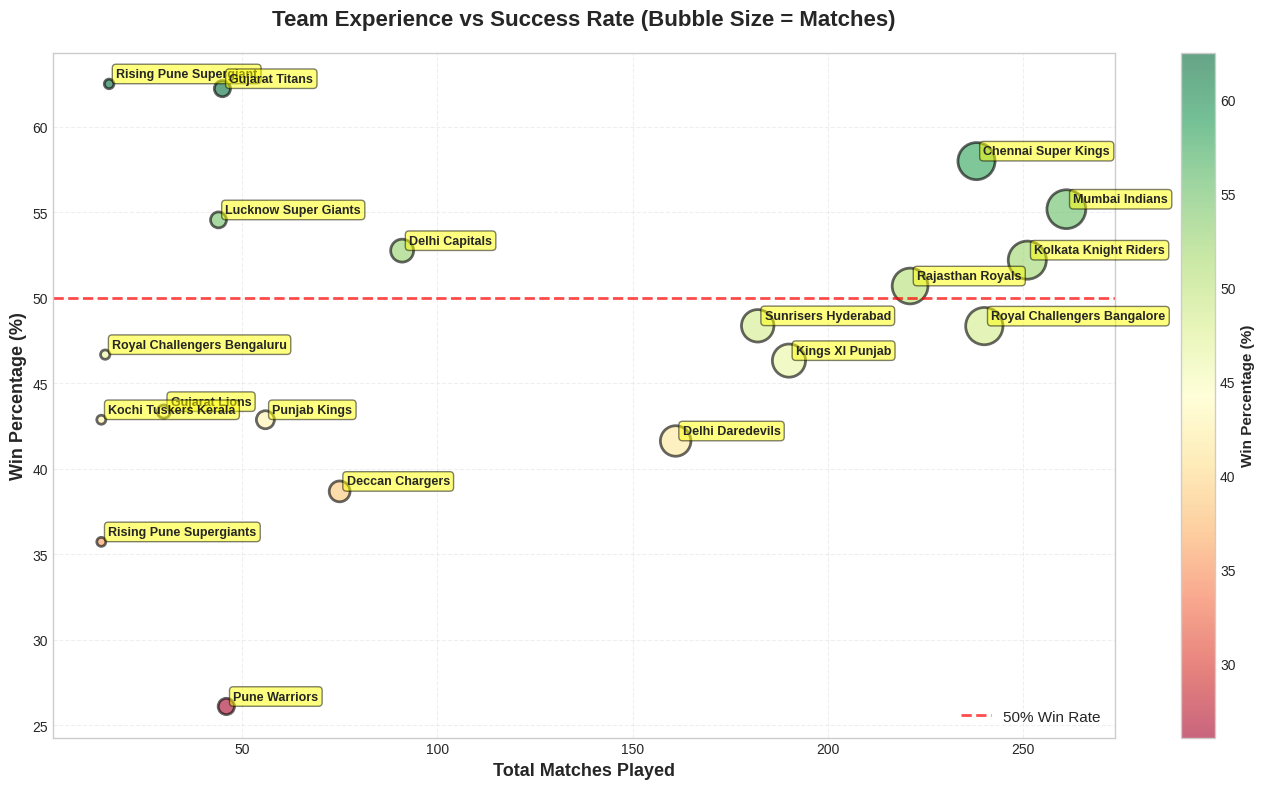

✓ Saved: viz_19_experience_vs_success.png



In [ ]:
# ============================================================================
# VISUALIZATION 19: SCATTER PLOT - MATCHES VS WIN PERCENTAGE
# ============================================================================
print("="*80)
print("VIZ 19: Team Experience vs Success Rate")
print("="*80)

# Calculate team stats
all_teams = set(df['team1'].unique()) | set(df['team2'].unique())
all_teams = {t for t in all_teams if pd.notna(t)}

team_stats = []
for team in all_teams:
    matches = len(df[(df['team1'] == team) | (df['team2'] == team)])
    wins = len(df[df['winner'] == team])
    win_pct = (wins / matches * 100) if matches > 0 else 0
    team_stats.append({'Team': team, 'Matches': matches, 'Win_Pct': win_pct})

team_stats_df = pd.DataFrame(team_stats)

fig, ax = plt.subplots(figsize=(14, 8))

# Scatter plot
scatter = ax.scatter(team_stats_df['Matches'], team_stats_df['Win_Pct'],
                     s=team_stats_df['Matches']*3,
                     c=team_stats_df['Win_Pct'],
                     cmap='RdYlGn',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=2)

# Add team labels
for idx, row in team_stats_df.iterrows():
    ax.annotate(row['Team'],
                xy=(row['Matches'], row['Win_Pct']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

ax.set_xlabel('Total Matches Played', fontsize=13, fontweight='bold')
ax.set_ylabel('Win Percentage (%)', fontsize=13, fontweight='bold')
ax.set_title('Team Experience vs Success Rate (Bubble Size = Matches)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Win Percentage (%)', fontsize=11, fontweight='bold')

# Add reference line at 50%
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% Win Rate')
ax.legend(fontsize=11, loc='lower right')

plt.tight_layout()
plt.savefig('viz_19_experience_vs_success.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_19_experience_vs_success.png\n")

VIZ 20: Team Performance Across Top Venues (Heatmap)


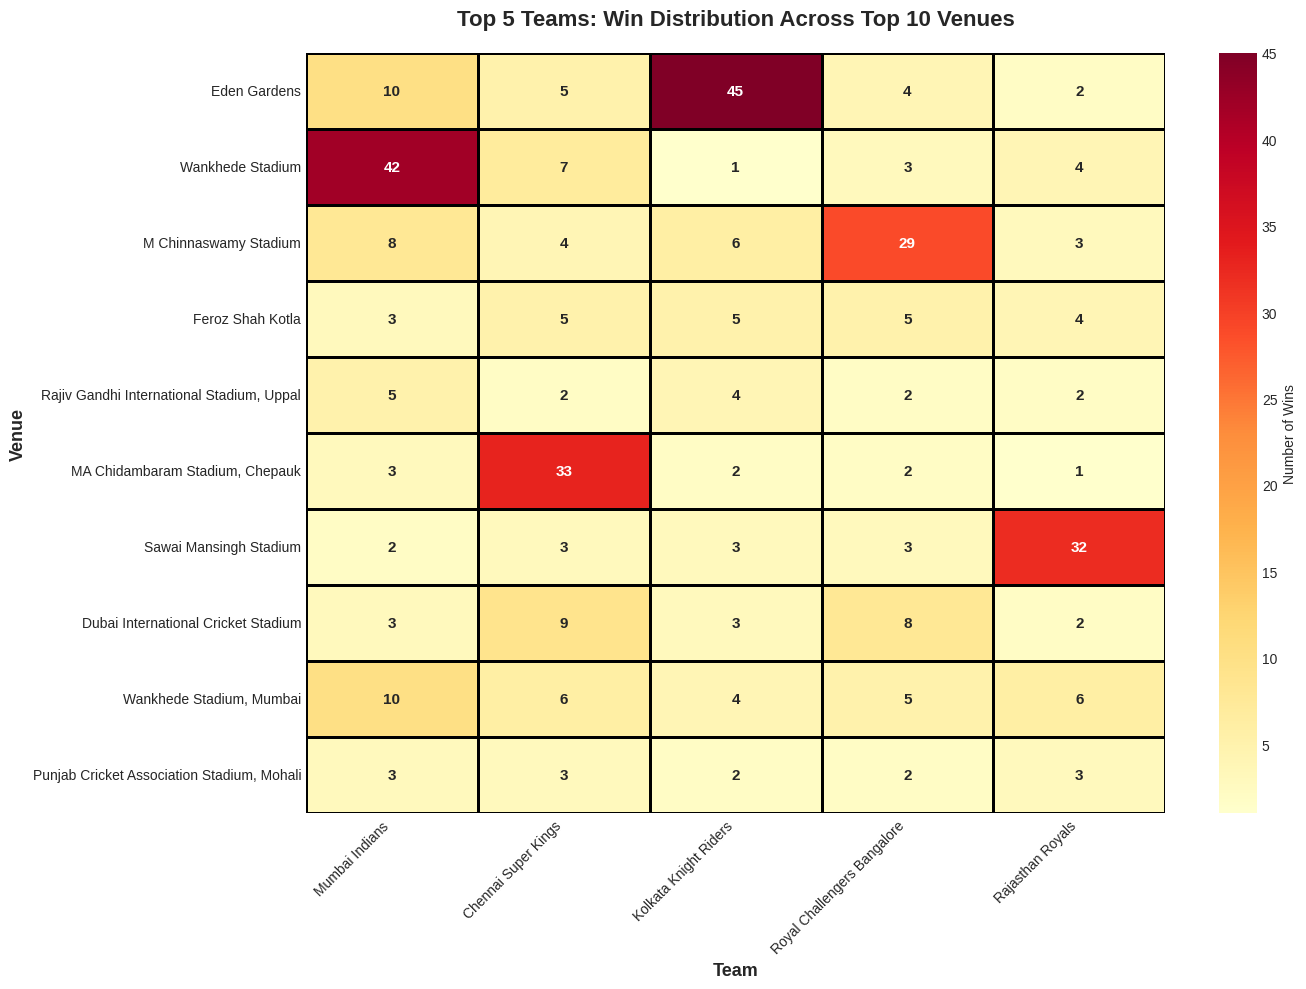

✓ Saved: viz_20_venue_team_heatmap.png



In [ ]:
# ============================================================================
# VISUALIZATION 20: HEATMAP - VENUE SUCCESS BY TOP TEAMS
# ============================================================================
print("="*80)
print("VIZ 20: Team Performance Across Top Venues (Heatmap)")
print("="*80)

# Get top 5 teams and top 10 venues
top_5_teams = df['winner'].value_counts().head(5).index.tolist()
top_10_venues = df['venue'].value_counts().head(10).index.tolist()

# Create matrix of wins
venue_team_matrix = pd.DataFrame(index=top_10_venues, columns=top_5_teams)

for venue in top_10_venues:
    for team in top_5_teams:
        wins = len(df[(df['venue'] == venue) & (df['winner'] == team)])
        venue_team_matrix.loc[venue, team] = wins

venue_team_matrix = venue_team_matrix.astype(float)

fig, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(venue_team_matrix, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=2, linecolor='black', cbar_kws={'label': 'Number of Wins'},
            ax=ax, square=False, annot_kws={'fontsize': 11, 'fontweight': 'bold'})

ax.set_xlabel('Team', fontsize=13, fontweight='bold')
ax.set_ylabel('Venue', fontsize=13, fontweight='bold')
ax.set_title('Top 5 Teams: Win Distribution Across Top 10 Venues',
             fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('viz_20_venue_team_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_20_venue_team_heatmap.png\n")

VIZ 21: Team Performance Profile (Radar Chart)


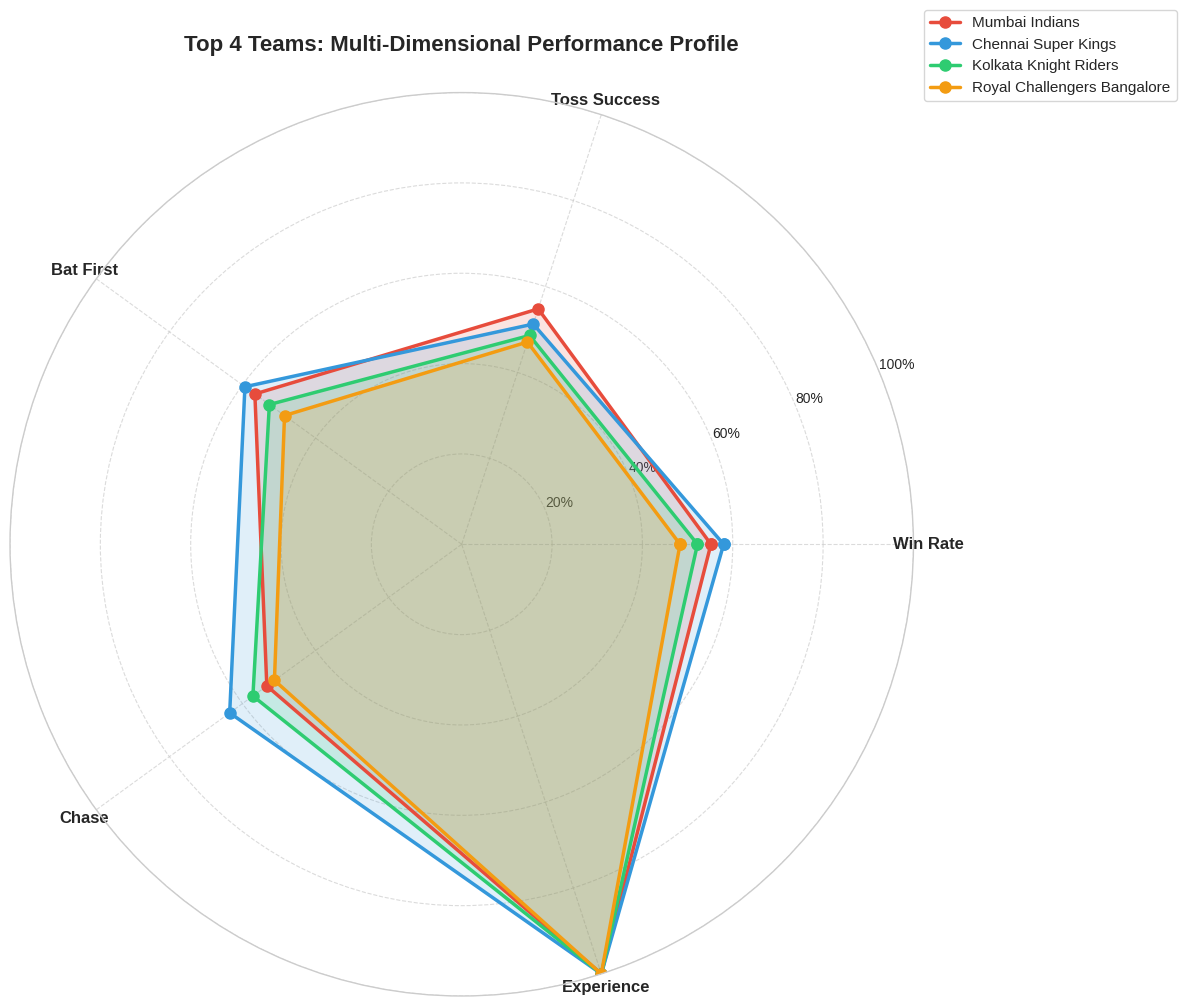

✓ Saved: viz_21_team_radar_chart.png

VIZ 22: IPL Comprehensive Dashboard (4-Panel)


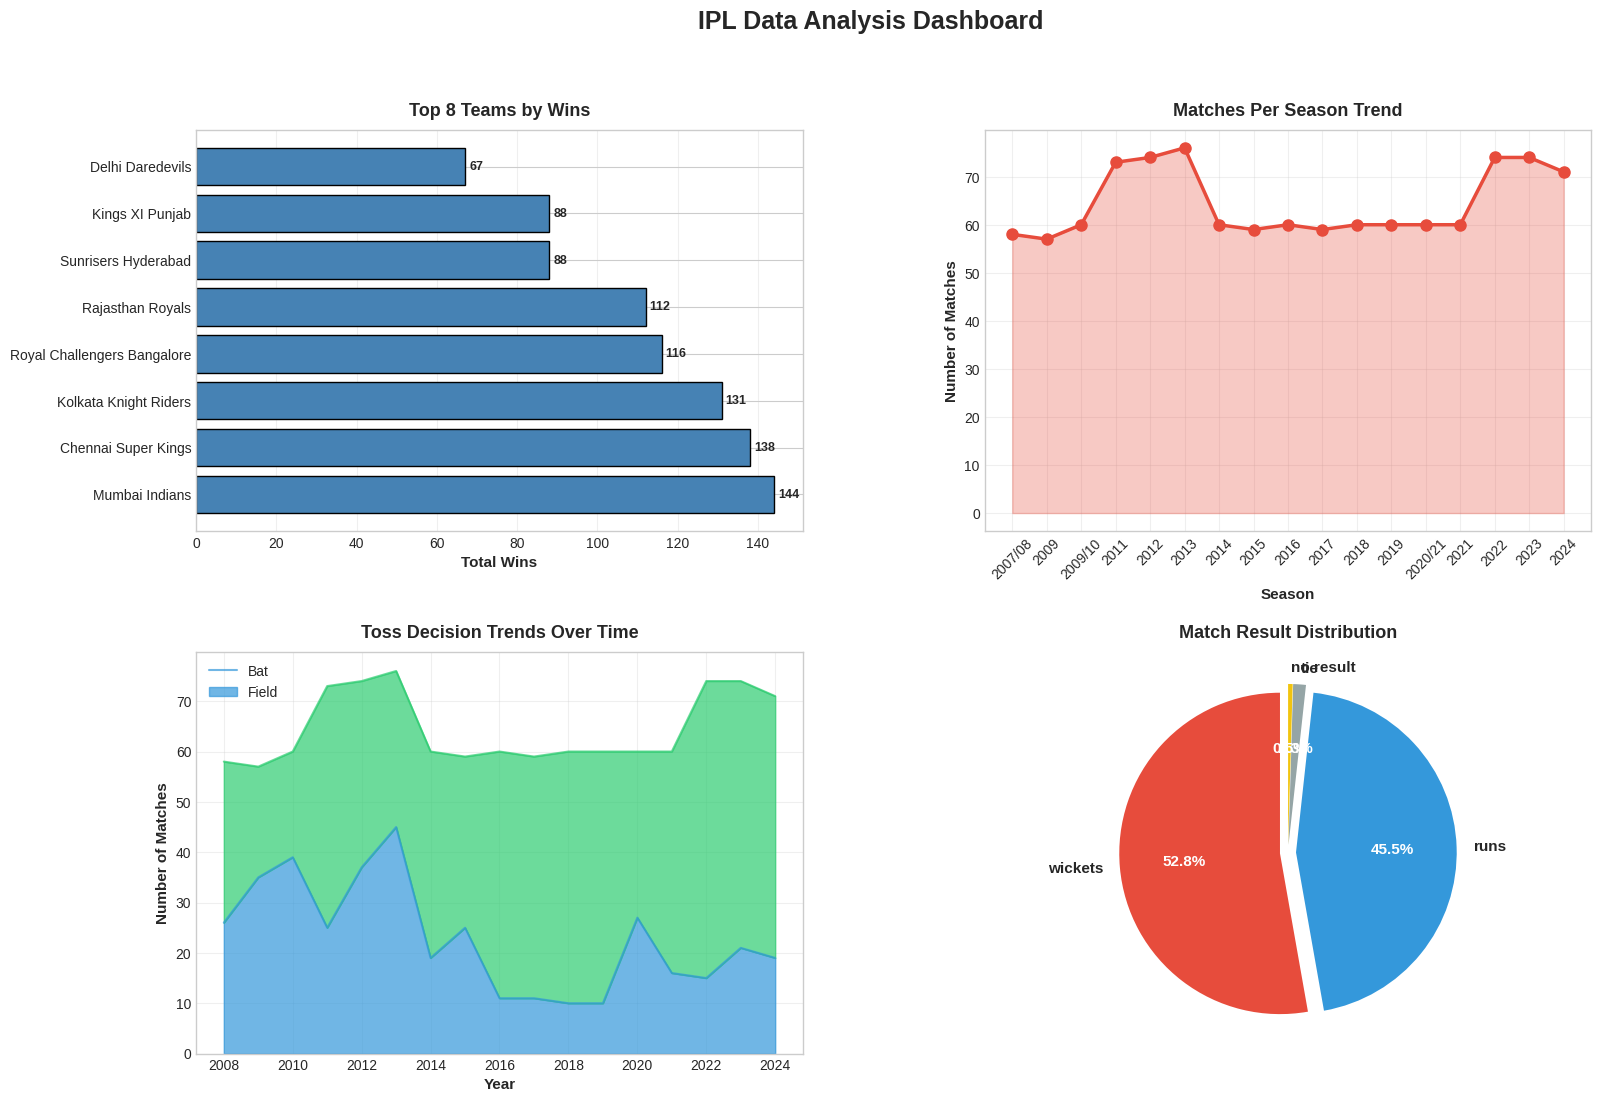

✓ Saved: viz_22_comprehensive_dashboard.png



In [ ]:
# ============================================================================
# VISUALIZATION 21: POLAR/RADAR CHART - TEAM ATTRIBUTES
# ============================================================================
print("="*80)
print("VIZ 21: Team Performance Profile (Radar Chart)")
print("="*80)

# Select top 4 teams
top_4_teams = df_cleaned['winner'].value_counts().head(4).index.tolist()

# Calculate various metrics for each team
team_metrics = []
for team in top_4_teams:
    team_matches = df_cleaned[(df_cleaned['team1'] == team) | (df_cleaned['team2'] == team)]
    wins = len(df_cleaned[df_cleaned['winner'] == team])
    total_matches = len(team_matches)

    # Metrics
    win_rate = (wins / total_matches * 100) if total_matches > 0 else 0

    # Toss win rate
    toss_wins = len(team_matches[team_matches['toss_winner'] == team])
    toss_win_rate = (toss_wins / total_matches * 100) if total_matches > 0 else 0

    # Bat first wins
    bat_first_matches = team_matches[
        ((team_matches['team1'] == team) | (team_matches['team2'] == team)) &
        (team_matches['toss_winner'] == team) &
        (team_matches['toss_decision'] == 'bat')
    ]
    bat_wins = len(bat_first_matches[bat_first_matches['winner'] == team])
    bat_win_rate = (bat_wins / len(bat_first_matches) * 100) if len(bat_first_matches) > 0 else 0

    # Chase wins
    field_first_matches = team_matches[
        ((team_matches['team1'] == team) | (team_matches['team2'] == team)) &
        (team_matches['toss_winner'] == team) &
        (team_matches['toss_decision'] == 'field')
    ]
    chase_wins = len(field_first_matches[field_first_matches['winner'] == team])
    chase_win_rate = (chase_wins / len(field_first_matches) * 100) if len(field_first_matches) > 0 else 0

    # Experience (normalized)
    experience = min((total_matches / 200) * 100, 100)

    team_metrics.append({
        'Team': team,
        'Win_Rate': win_rate,
        'Toss_Success': toss_win_rate,
        'Bat_First': bat_win_rate,
        'Chase': chase_win_rate,
        'Experience': experience
    })

metrics_df = pd.DataFrame(team_metrics)

# Create radar chart
categories = ['Win Rate', 'Toss Success', 'Bat First', 'Chase', 'Experience']
num_vars = len(categories)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

for idx, row in metrics_df.iterrows():
    values = [row['Win_Rate'], row['Toss_Success'], row['Bat_First'],
              row['Chase'], row['Experience']]
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['Team'],
            color=colors[idx], markersize=8)
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)
ax.set_title('Top 4 Teams: Multi-Dimensional Performance Profile',
             fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11, frameon=True)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('viz_21_team_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_21_team_radar_chart.png\n")


# ============================================================================
# VISUALIZATION 22: SUBPLOTS GRID - COMPREHENSIVE OVERVIEW
# ============================================================================
print("="*80)
print("VIZ 22: IPL Comprehensive Dashboard (4-Panel)")
print("="*80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Panel 1: Top 8 Teams by Wins
ax1 = fig.add_subplot(gs[0, 0])
top_8 = df_cleaned['winner'].value_counts().head(8)
bars1 = ax1.barh(range(len(top_8)), top_8.values, color='steelblue', edgecolor='black')
ax1.set_yticks(range(len(top_8)))
ax1.set_yticklabels(top_8.index, fontsize=10)
ax1.set_xlabel('Total Wins', fontsize=11, fontweight='bold')
ax1.set_title('Top 8 Teams by Wins', fontsize=13, fontweight='bold', pad=10)
ax1.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars1):
    ax1.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(int(top_8.values[i])), va='center', fontweight='bold', fontsize=9)

# Panel 2: Matches per Season
ax2 = fig.add_subplot(gs[0, 1])
season_counts = df_cleaned['season'].value_counts().sort_index()
ax2.plot(season_counts.index, season_counts.values, marker='o',
         linewidth=2.5, markersize=8, color='#e74c3c')
ax2.fill_between(season_counts.index, season_counts.values, alpha=0.3, color='#e74c3c')
ax2.set_xlabel('Season', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Matches', fontsize=11, fontweight='bold')
ax2.set_title('Matches Per Season Trend', fontsize=13, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Panel 3: Toss Decision by Year
ax3 = fig.add_subplot(gs[1, 0])
toss_by_year = df_cleaned.groupby(['year', 'toss_decision']).size().unstack(fill_value=0)
toss_by_year.plot(kind='area', stacked=True, ax=ax3, color=['#3498db', '#2ecc71'], alpha=0.7)
ax3.set_xlabel('Year', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Matches', fontsize=11, fontweight='bold')
ax3.set_title('Toss Decision Trends Over Time', fontsize=13, fontweight='bold', pad=10)
ax3.legend(['Bat', 'Field'], fontsize=10, loc='upper left')
ax3.grid(True, alpha=0.3)

# Panel 4: Result Type Distribution
ax4 = fig.add_subplot(gs[1, 1])
result_counts = df_cleaned['result'].value_counts()
wedges, texts, autotexts = ax4.pie(result_counts.values, labels=result_counts.index,
                                     autopct='%1.1f%%', startangle=90,
                                     colors=['#e74c3c', '#3498db', '#95a5a6', '#f1c40f'], # Added one more color
                                     explode=(0.05, 0.05, 0.05, 0.05)) # Adjusted explode to match 4 categories
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')
ax4.set_title('Match Result Distribution', fontsize=13, fontweight='bold', pad=10)

fig.suptitle('IPL Data Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.savefig('viz_22_comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_22_comprehensive_dashboard.png\n")

VIZ 23: Top 12 Venues with Match Distribution


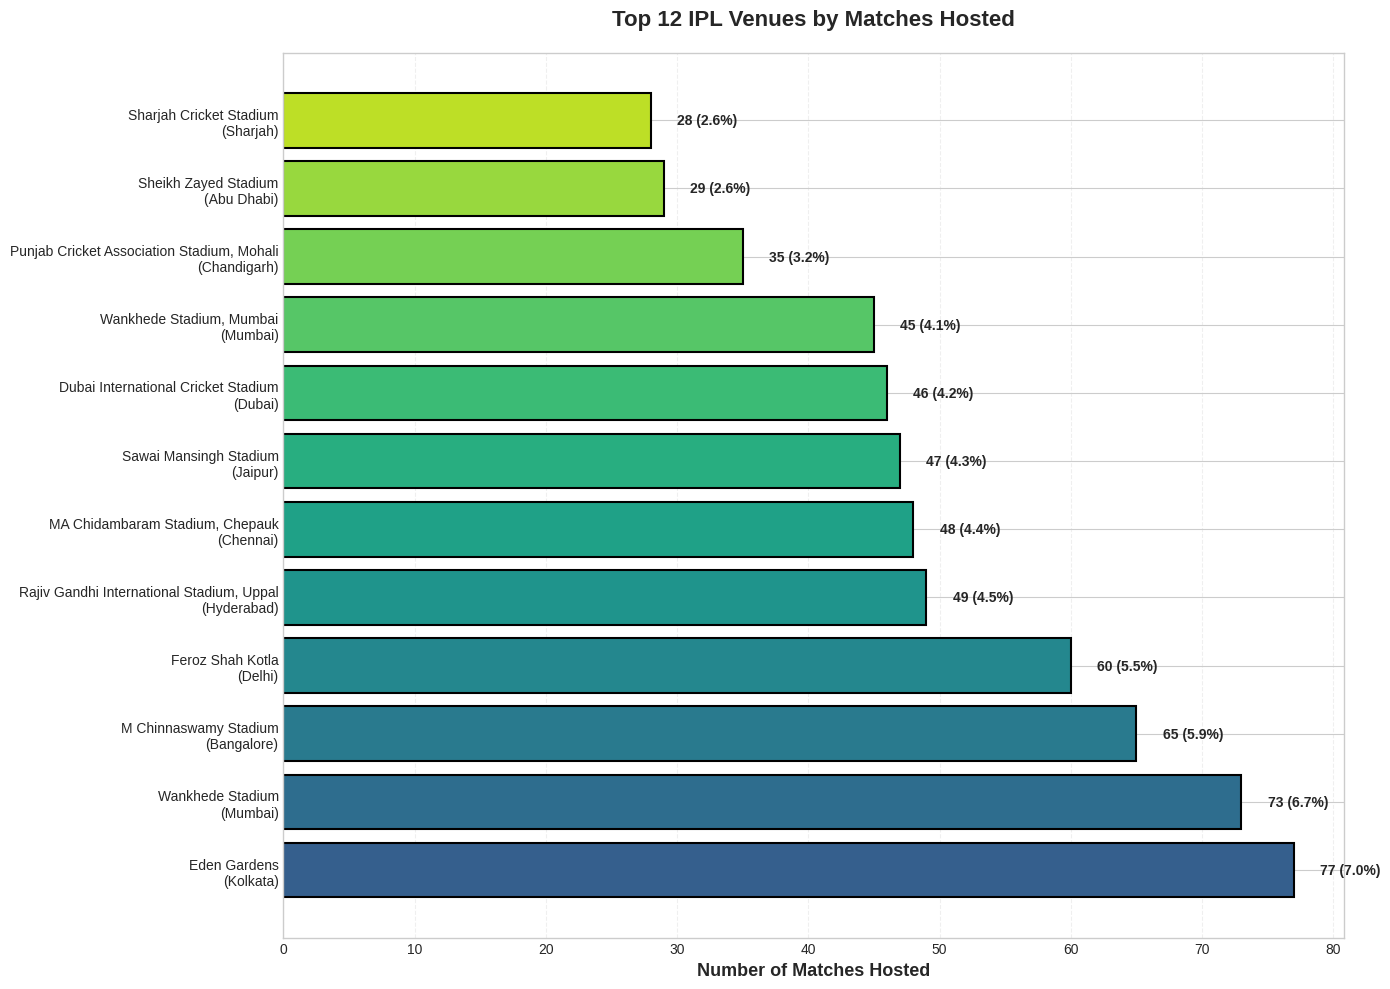

✓ Saved: viz_23_top_venues_detailed.png



In [ ]:
# ============================================================================
# VISUALIZATION 23: HORIZONTAL BAR RACE STYLE - TOP VENUES
# ============================================================================
print("="*80)
print("VIZ 23: Top 12 Venues with Match Distribution")
print("="*80)

venue_counts = df['venue'].value_counts().head(12)
city_map = df.groupby('venue')['city'].first()

fig, ax = plt.subplots(figsize=(14, 10))

# Create gradient colors
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(venue_counts)))

bars = ax.barh(range(len(venue_counts)), venue_counts.values, color=colors,
               edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(venue_counts)))
ax.set_yticklabels([f"{venue}\n({city_map[venue]})" for venue in venue_counts.index],
                    fontsize=10)
ax.set_xlabel('Number of Matches Hosted', fontsize=13, fontweight='bold')
ax.set_title('Top 12 IPL Venues by Matches Hosted', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels and percentage
total_matches = len(df)
for i, (bar, value) in enumerate(zip(bars, venue_counts.values)):
    percentage = (value / total_matches * 100)
    ax.text(value + 2, i, f'{int(value)} ({percentage:.1f}%)',
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('viz_23_top_venues_detailed.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_23_top_venues_detailed.png\n")


VIZ 24: Home vs Away Performance (Diverging Bars)


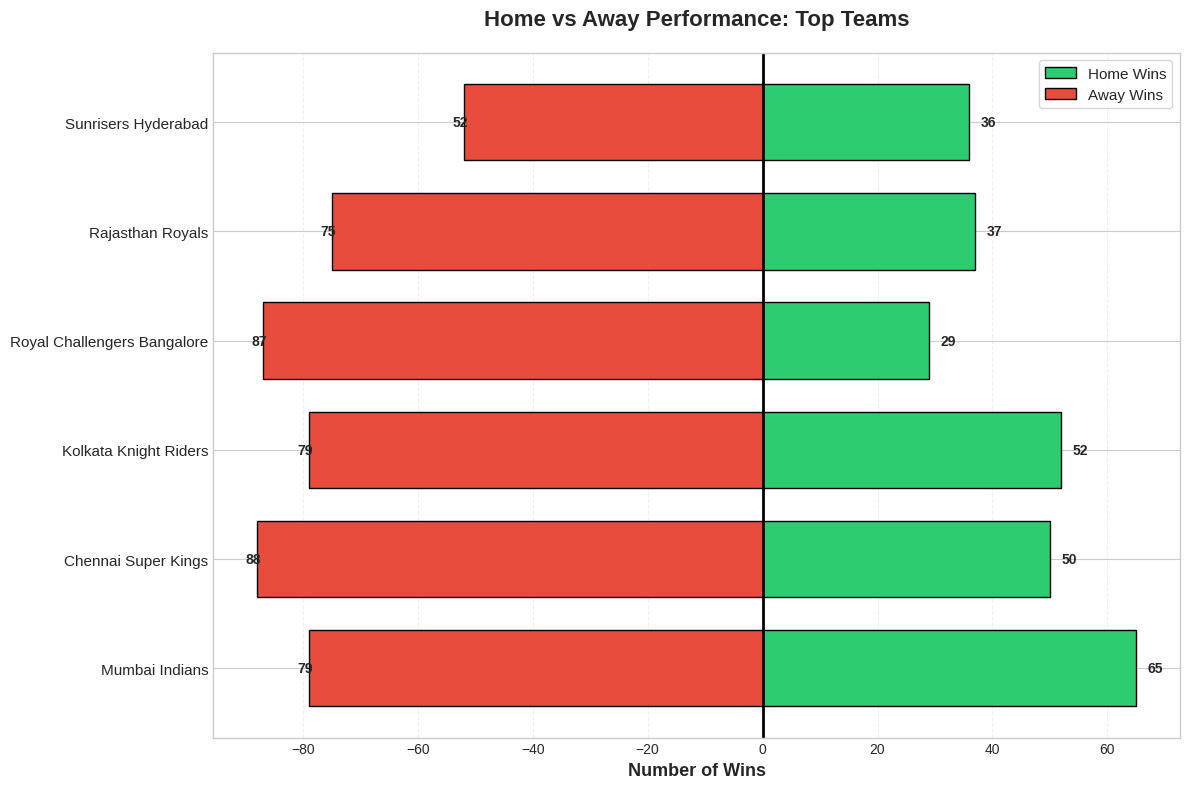

✓ Saved: viz_24_home_away_diverging.png



In [ ]:
# ============================================================================
# VISUALIZATION 24: DIVERGING BAR CHART - HOME ADVANTAGE
# ============================================================================
print("="*80)
print("VIZ 24: Home vs Away Performance (Diverging Bars)")
print("="*80)

# Calculate home vs away wins for top teams
# Simplified approach: use city-based home advantage
top_6_teams = df['winner'].value_counts().head(6).index.tolist()

# Team home cities (simplified mapping)
team_cities = {
    'Mumbai Indians': 'Mumbai',
    'Chennai Super Kings': 'Chennai',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Rajasthan Royals': 'Jaipur',
    'Delhi Capitals': 'Delhi',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Kings XI Punjab': 'Mohali'
}

home_away_data = []
for team in top_6_teams[:6]:  # Top 6 teams
    if team in team_cities:
        home_city = team_cities[team]

        # Home wins
        home_wins = len(df[(df['winner'] == team) &
                          (df['city'].str.contains(home_city, case=False, na=False))])

        # Away wins
        total_wins = len(df[df['winner'] == team])
        away_wins = total_wins - home_wins

        home_away_data.append({
            'Team': team,
            'Home_Wins': home_wins,
            'Away_Wins': away_wins
        })

if home_away_data:  # Only create chart if we have data
    ha_df = pd.DataFrame(home_away_data)

    fig, ax = plt.subplots(figsize=(12, 8))
    y_pos = np.arange(len(ha_df))

    # Plot diverging bars
    ax.barh(y_pos, ha_df['Home_Wins'], color='#2ecc71', edgecolor='black',
            label='Home Wins', height=0.7)
    ax.barh(y_pos, -ha_df['Away_Wins'], color='#e74c3c', edgecolor='black',
            label='Away Wins', height=0.7)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(ha_df['Team'], fontsize=11)
    ax.set_xlabel('Number of Wins', fontsize=13, fontweight='bold')
    ax.set_title('Home vs Away Performance: Top Teams',
                 fontsize=16, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linewidth=2)
    ax.legend(fontsize=11, loc='best', frameon=True)
    ax.grid(axis='x', alpha=0.3, linestyle='--')

    # Add value labels
    for i, row in ha_df.iterrows():
        ax.text(row['Home_Wins'] + 2, i, str(int(row['Home_Wins'])),
                va='center', fontweight='bold', fontsize=10)
        ax.text(-row['Away_Wins'] - 2, i, str(int(row['Away_Wins'])),
                va='center', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.savefig('viz_24_home_away_diverging.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Saved: viz_24_home_away_diverging.png\n")
else:
    print("⚠ Skipped: Not enough data for home/away analysis\n")


VIZ 25: Match Frequency Over Time with Trend


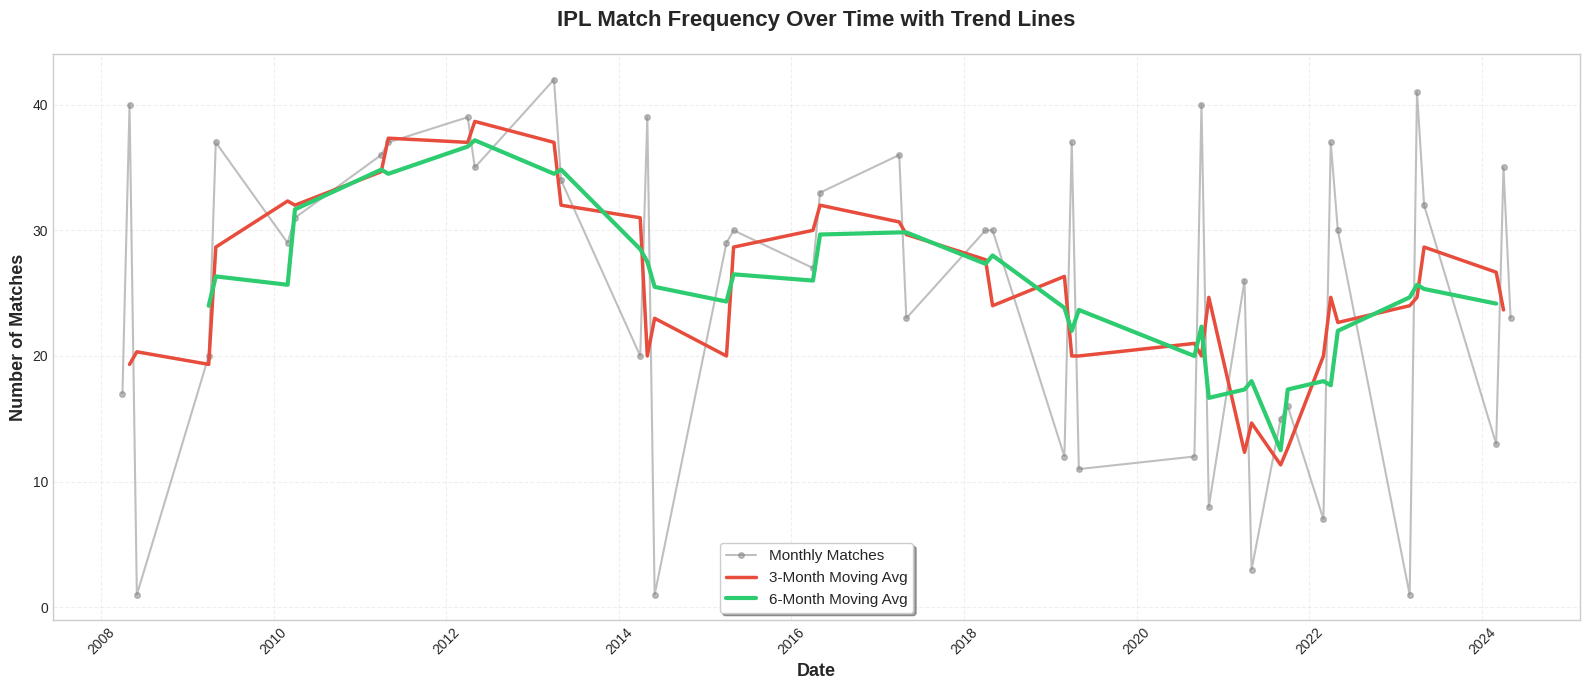

✓ Saved: viz_25_time_series_trend.png



In [ ]:
# ============================================================================
# VISUALIZATION 25: TIME SERIES WITH MOVING AVERAGE
# ============================================================================
print("="*80)
print("VIZ 25: Match Frequency Over Time with Trend")
print("="*80)

# Group by date and count matches
daily_matches = df_cleaned.groupby(df_cleaned['date'].dt.to_period('M')).size().reset_index(name='matches')
daily_matches['date'] = daily_matches['date'].dt.to_timestamp()

# Calculate moving average
daily_matches['ma_3'] = daily_matches['matches'].rolling(window=3, center=True).mean()
daily_matches['ma_6'] = daily_matches['matches'].rolling(window=6, center=True).mean()

fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(daily_matches['date'], daily_matches['matches'],
        marker='o', linewidth=1.5, markersize=4, alpha=0.5,
        color='gray', label='Monthly Matches')

ax.plot(daily_matches['date'], daily_matches['ma_3'],
        linewidth=2.5, color='#e74c3c', label='3-Month Moving Avg')

ax.plot(daily_matches['date'], daily_matches['ma_6'],
        linewidth=3, color='#2ecc71', label='6-Month Moving Avg')

ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Matches', fontsize=13, fontweight='bold')
ax.set_title('IPL Match Frequency Over Time with Trend Lines',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best', frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('viz_25_time_series_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_25_time_series_trend.png\n")

VIZ 26: Player of Match Awards Distribution by Team


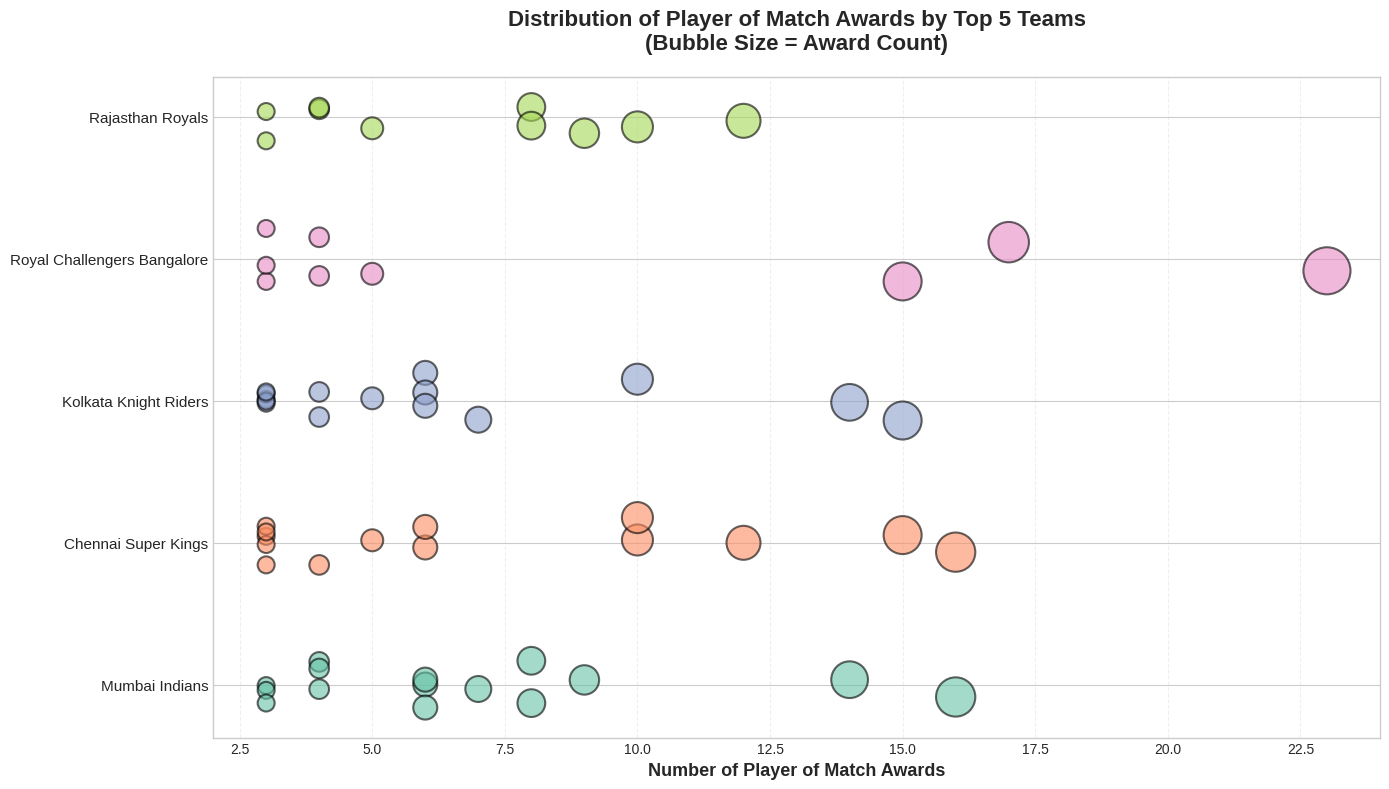

✓ Saved: viz_26_player_awards_strip.png



In [ ]:
# ============================================================================
# VISUALIZATION 26: STRIP PLOT - PLAYER AWARDS DISTRIBUTION
# ============================================================================
print("="*80)
print("VIZ 26: Player of Match Awards Distribution by Team")
print("="*80)

# Get top 5 teams and their player awards
top_5_teams_list = df['winner'].value_counts().head(5).index.tolist()

# Get player awards for these teams
player_awards = []
for team in top_5_teams_list:
    team_matches = df[df['winner'] == team]
    player_counts = team_matches['player_of_match'].value_counts()
    for player, count in player_counts.items():
        if pd.notna(player):
            player_awards.append({'Team': team, 'Player': player, 'Awards': count})

awards_df = pd.DataFrame(player_awards)
# Keep only players with 3+ awards
awards_df = awards_df[awards_df['Awards'] >= 3]

fig, ax = plt.subplots(figsize=(14, 8))

# Create strip plot with jitter
for i, team in enumerate(top_5_teams_list):
    team_data = awards_df[awards_df['Team'] == team]
    y = np.random.normal(i, 0.1, len(team_data))
    scatter = ax.scatter(team_data['Awards'], y, s=team_data['Awards']*50,
                        alpha=0.6, edgecolors='black', linewidth=1.5,
                        label=team if i == 0 else "")

ax.set_yticks(range(len(top_5_teams_list)))
ax.set_yticklabels(top_5_teams_list, fontsize=11)
ax.set_xlabel('Number of Player of Match Awards', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Player of Match Awards by Top 5 Teams\n(Bubble Size = Award Count)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('viz_26_player_awards_strip.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: viz_26_player_awards_strip.png\n")